In [328]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회기분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델

# Tree
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [119]:
# 데이터 불러오기 (대출)
df_a = pd.read_csv('/home/piai/박상재/빅데이터 조별과제/보험/01_Data_set_대출.csv', encoding='euc-kr')
df_a.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0


In [120]:
# 데이터 불러오기 (보험)
df_b = pd.read_csv('/home/piai/박상재/빅데이터 조별과제/보험/01_Data_set_보험.csv', encoding='euc-kr')
df_b.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
0,1,공무원,5400,7700,4,1,24.0,주부,0,0,...,20000000,20000000,0,0,10,0,0,0,50,1
1,2,자영업,5500,8100,4,2,29.0,주부,0,0,...,7000000,36000000,0,0,0,300000,2,5,50,1
2,3,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,...,11000000,11000000,0,0,0,0,0,2,60,2
3,4,학생,0,10100,2,1,0.0,NaN,0,0,...,4000000,4000000,0,0,0,0,0,1,35,1
4,5,공무원,4800,4800,4,1,14.0,주부,0,0,...,4000000,4000000,0,0,0,500000,2,1,45,1


In [121]:
# 데이터 병합
df_merge = pd.merge(df_a, df_b, on='CUST_ID')

In [122]:
# 병합 후 컬럼명 확인
df_merge.columns

Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'OCCP_NAME_G',
       'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM',
       'LAST_CHLD_AGE', 'MATE_OCCP_NAME_G', 'MATE_JOB_INCM', 'CRDT_LOAN_CNT',
       'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE',
       'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE', 'STRT_CRDT_GRAD',
       'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE', 'AVG_STLN_RATE',
       'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM',
       'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT',
       'FMLY_PLPY_CNT', 'AGE', 'SEX'],
      d

In [123]:
# 정보 확인
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100233 entries, 0 to 100232
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CUST_ID            100233 non-null  int64  
 1   TARGET             100233 non-null  int64  
 2   BNK_LNIF_CNT       100233 non-null  int64  
 3   CPT_LNIF_CNT       100233 non-null  int64  
 4   SPART_LNIF_CNT     100233 non-null  int64  
 5   ECT_LNIF_CNT       100233 non-null  int64  
 6   TOT_LNIF_AMT       100233 non-null  int64  
 7   TOT_CLIF_AMT       100233 non-null  int64  
 8   BNK_LNIF_AMT       100233 non-null  int64  
 9   CPT_LNIF_AMT       100233 non-null  int64  
 10  CRDT_OCCR_MDIF     100233 non-null  int64  
 11  SPTCT_OCCR_MDIF    100233 non-null  int64  
 12  CRDT_CARD_CNT      100233 non-null  int64  
 13  CTCD_OCCR_MDIF     100233 non-null  int64  
 14  CB_GUIF_CNT        100233 non-null  int64  
 15  CB_GUIF_AMT        100233 non-null  int64  
 16  OC

In [124]:
# 결측치 확인
df_merge.isnull().sum()

CUST_ID                  0
TARGET                   0
BNK_LNIF_CNT             0
CPT_LNIF_CNT             0
SPART_LNIF_CNT           0
ECT_LNIF_CNT             0
TOT_LNIF_AMT             0
TOT_CLIF_AMT             0
BNK_LNIF_AMT             0
CPT_LNIF_AMT             0
CRDT_OCCR_MDIF           0
SPTCT_OCCR_MDIF          0
CRDT_CARD_CNT            0
CTCD_OCCR_MDIF           0
CB_GUIF_CNT              0
CB_GUIF_AMT              0
OCCP_NAME_G            464
CUST_JOB_INCM            0
HSHD_INFR_INCM           0
ACTL_FMLY_NUM            0
CUST_FMLY_NUM            0
LAST_CHLD_AGE         1027
MATE_OCCP_NAME_G     45709
MATE_JOB_INCM            0
CRDT_LOAN_CNT            0
MIN_CNTT_DATE            0
TOT_CRLN_AMT             0
TOT_REPY_AMT             0
CRLN_OVDU_RATE           0
CRLN_30OVDU_RATE         0
LT1Y_CLOD_RATE           0
STRT_CRDT_GRAD           0
LTST_CRDT_GRAD           0
PREM_OVDU_RATE           0
LT1Y_PEOD_RATE           0
AVG_STLN_RATE            0
STLN_REMN_AMT            0
L

OCCP_NAME_G            464 (직업)
LAST_CHLD_AGE         1027 (막내 나이)
MATE_OCCP_NAME_G     45709 (배우자 직업)

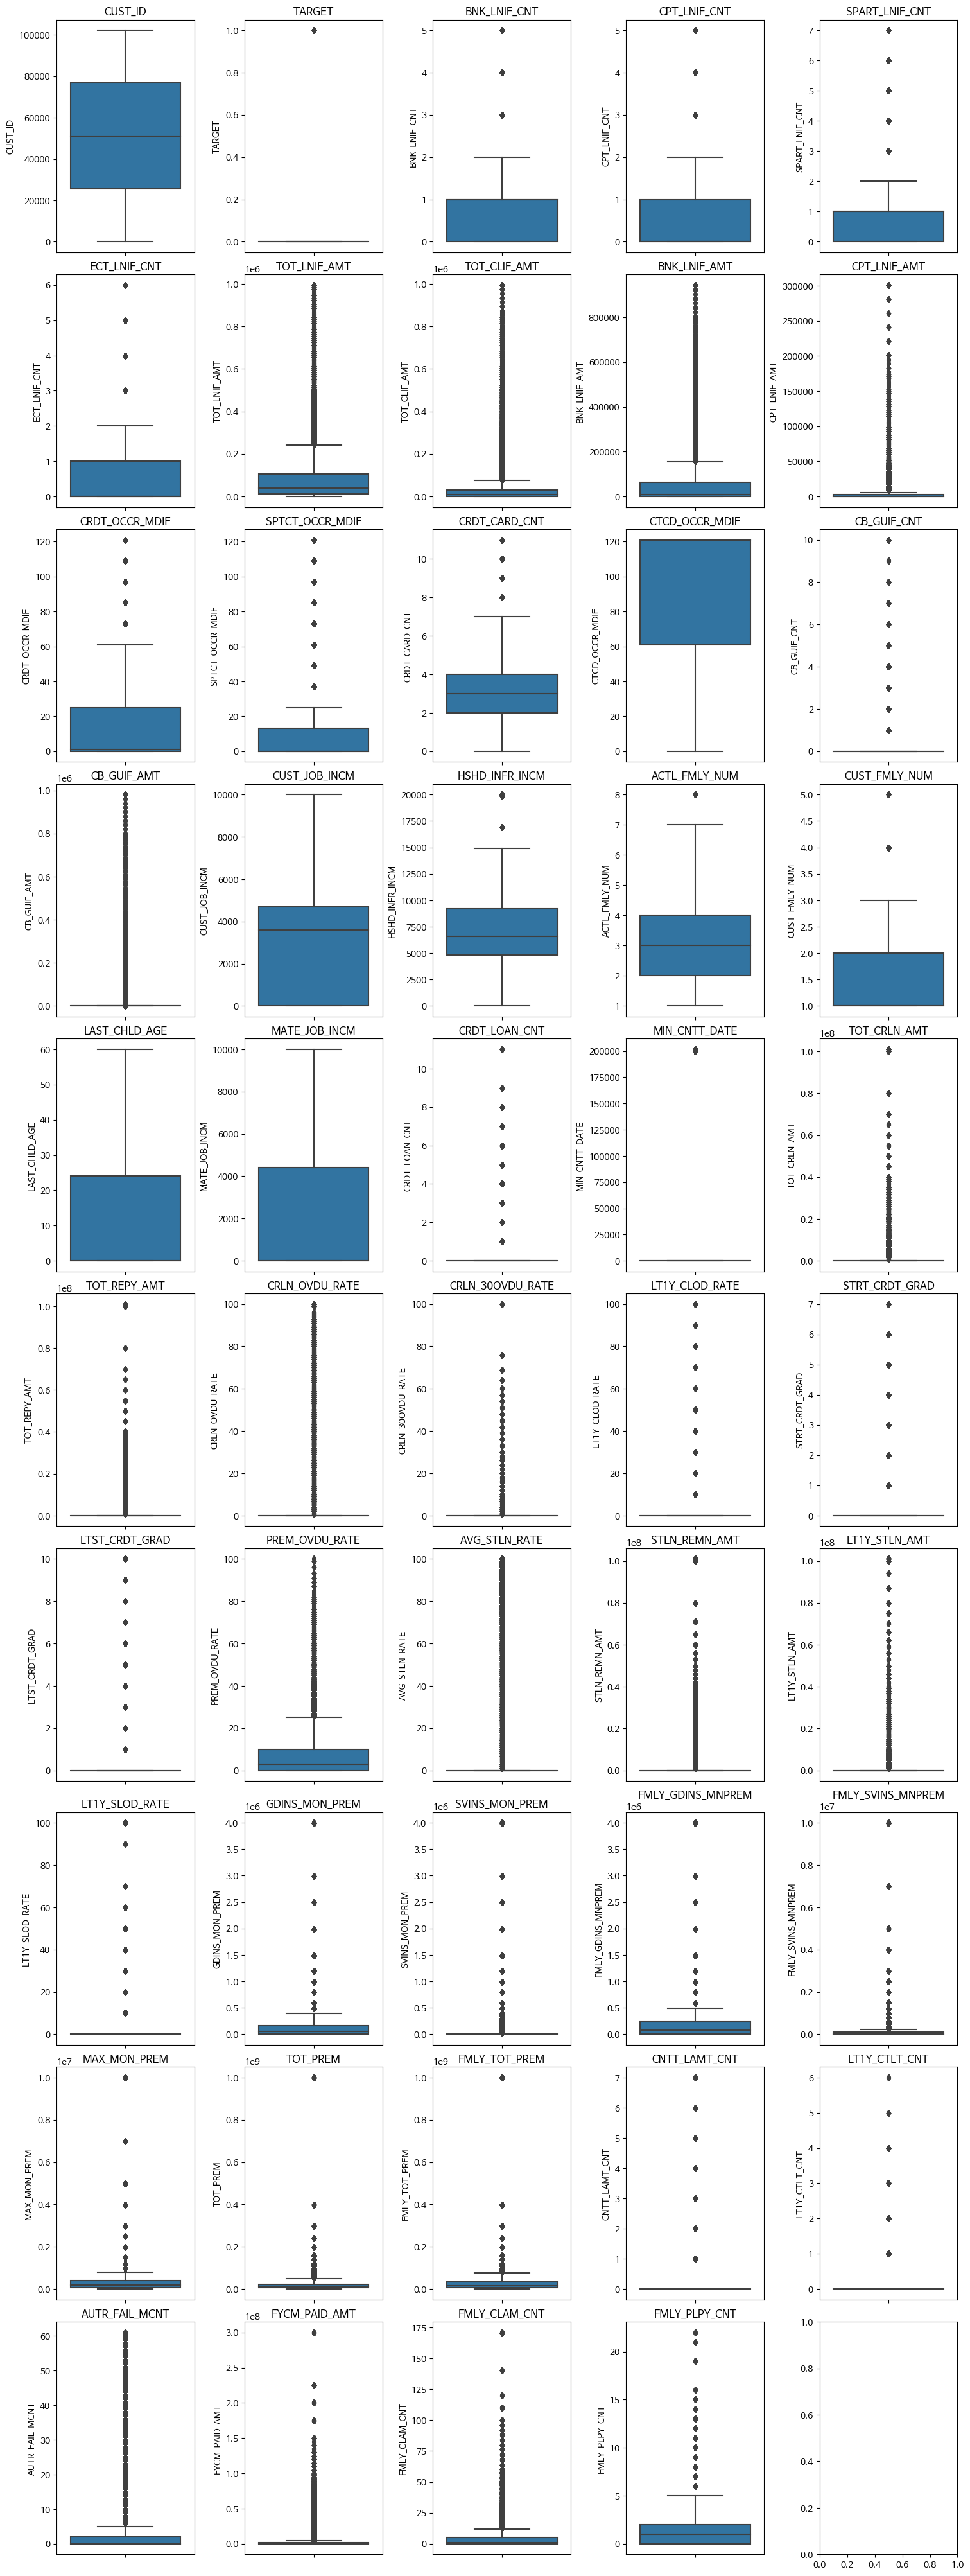

In [125]:
# 수치형 데이터 박스플롯으로 이상치 확인


# 데이터프레임 df_merge에서 이상치를 확인하고 싶은 숫자형 변수들을 선택
numeric_columns = df_merge.select_dtypes(include=['int64', 'float64']).columns

# 서브플롯 설정
fig, axes = plt.subplots(nrows=len(numeric_columns)//5 + 1, ncols=5, figsize=(15, 40), constrained_layout=True)

# 서브플롯에 박스플롯 그리기
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_merge[col], ax=axes[i//5, i%5])  # 여기서 y=df_merge[col]로 수정
    axes[i//5, i%5].set_title(col)

plt.show()



* 그래프로 확인 불가
* 분석 진행하면서 이상한값들 처리하기로 결정

## 결측치 및 이상치

* OCCP_NAME_G            464 (직업)
* LAST_CHLD_AGE         1027 (막내 나이)
* MATE_OCCP_NAME_G     45709 (배우자 직업)

#### OCCP_NAME_G(직업) 결측치, 이상치 처리

In [126]:
df_merge['OCCP_NAME_G'].fillna('무응답', inplace=True)

In [127]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
무응답           464
Name: OCCP_NAME_G, dtype: int64

In [128]:
df_merge['OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [129]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
무응답          1653
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

* OCCP_NAME_G(직업) 결측치를 '무응답'처리
* '*'값을 '무응답' 처리

#### MATE_OCCP_NAME_G(배우자 직업) 결측치, 이상치 처리

In [130]:
# 'MATE_JOB_INCM' 열이 0이 아니고 'MATE_OCCP_NAME_G' 열이 결측치인 행 선택
mask = (df_merge['MATE_JOB_INCM'] != 0) & (df_merge['MATE_OCCP_NAME_G'].isnull())

# 선택된 행의 'MATE_OCCP_NAME_G' 열을 '무응답'으로 채우기
df_merge.loc[mask, 'MATE_OCCP_NAME_G'] = '무응답'

# 나머지 'MATE_OCCP_NAME_G' 열의 결측치를 '배우자 없음'으로 채우기
df_merge['MATE_OCCP_NAME_G'].fillna('배우자 없음', inplace=True)

In [131]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
*            1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
무응답           360
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

* 결측치 중 360개를 무응답 처리

In [132]:
df_merge['MATE_OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [133]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
무응답          1387
단순 사무직       1316
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

* '*'값을 '무응답' 처리

#### LAST_CHLD_AGE(막내나이) 결측값

In [134]:
# 결측값을 KNN보간법으로 처리하기 위하여 변수들간 상관관계 확인
df_merge.corr()['LAST_CHLD_AGE']

CUST_ID              0.001767
TARGET              -0.021266
BNK_LNIF_CNT        -0.007348
CPT_LNIF_CNT        -0.019383
SPART_LNIF_CNT       0.010164
ECT_LNIF_CNT         0.032922
TOT_LNIF_AMT         0.041163
TOT_CLIF_AMT         0.021346
BNK_LNIF_AMT         0.022599
CPT_LNIF_AMT        -0.009114
CRDT_OCCR_MDIF       0.066958
SPTCT_OCCR_MDIF      0.075368
CRDT_CARD_CNT        0.019596
CTCD_OCCR_MDIF       0.098527
CB_GUIF_CNT          0.022137
CB_GUIF_AMT          0.017837
CUST_JOB_INCM       -0.160491
HSHD_INFR_INCM       0.128827
ACTL_FMLY_NUM        0.611842
CUST_FMLY_NUM        0.207177
LAST_CHLD_AGE        1.000000
MATE_JOB_INCM        0.211298
CRDT_LOAN_CNT        0.138272
MIN_CNTT_DATE        0.162544
TOT_CRLN_AMT         0.120381
TOT_REPY_AMT         0.115229
CRLN_OVDU_RATE       0.125099
CRLN_30OVDU_RATE     0.035256
LT1Y_CLOD_RATE       0.027591
STRT_CRDT_GRAD       0.067917
LTST_CRDT_GRAD       0.096891
PREM_OVDU_RATE       0.076861
AVG_STLN_RATE        0.116409
STLN_REMN_

* 20세 기준 양육기와 비양육기의 비연금저축상품 납입 보험료는 양육기가 아주 살짝 더 높지만 유의미하다고 보이지는 않는다

In [135]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'LAST_CHLD_AGE'열과 'ACTL_FMLY_NUM'열을 선택하여 보간 수행
columns_to_interpolate = ['LAST_CHLD_AGE', 'ACTL_FMLY_NUM']
df_merge[columns_to_interpolate] = imputer.fit_transform(df_merge[columns_to_interpolate])

* CUST_FMLY_NUM(가족수) LAST_CHLD_AGE(막내나이)변수의 주변 5개 평균으로 결측처리 완료

#### AGE, SEX열 '*'값

In [136]:
df_merge[df_merge['AGE']== '*']['AGE'].count()

430

In [137]:
df_merge[df_merge['SEX']== '*']['SEX'].count()

430

* 일단 추후에 성별, 나이를 사용하는 분석 or 모델링에서는 '*'를 제외하고 사용하도록 하자
* 다른 컬럼의 값은 유효하므로 바로 제거하는 판단은 x

## 파생변수 생성

#### 양육기 변수 생성

In [138]:
# '양육기' 컬럼 추가 및 초기화
df_merge['양육기'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기' 컬럼에 값을 할당
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) <= 20, '양육기'] = 1
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기'] = 0

* 막내자녀가 20세 미만인 가입자 유무를 0/1로 표시

#### 양육기간 변수 생성

In [139]:
# '양육기간' 컬럼 추가 및 초기화
df_merge['양육기간'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기간' 컬럼에 값을 할당
df_merge['양육기간'] = df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1)
df_merge['양육기간'] = df_merge['양육기간'].apply(lambda x: 30 - x if x <= 30 else 0)
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기간'] = 0

* 보험사에서 보험계약기준으로 사용하는 30세를 기준으로 계약을 얼마나 할 수 있는나 30-막내나이 변수를 생성

In [140]:
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,10,0,0,0,50,1,0,6.0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,0,300000,2,5,50,1,0,1.0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,0,2,60,2,0,0.0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,0,1,35,1,0,0.0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,0,500000,2,1,45,1,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,0,1,700000,0,3,55,2,0,0.0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,0,0,100000,0,3,45,2,1,11.0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,0,1,0,0,4,45,1,1,16.0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,0,0,0,45,1,0,0.0


#### 해지유무 변수 생성

In [142]:
# TERM:해지 MAIN:유지 
df_merge['TERM/MAIN'] = ''
df_merge.loc[df_merge['CNTT_LAMT_CNT'] == 0, 'TERM/MAIN'] = 0
df_merge.loc[df_merge['CNTT_LAMT_CNT'] != 0, 'TERM/MAIN'] = 1

#### 고객별 가장 많이 이용한 금융권 변수 생성

In [197]:
# 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT' 열 선택
loan_columns = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']

# 각 행별로 가장 큰 값과 해당하는 컬럼명을 찾아 'MAX_LNIF_CNT' 컬럼 생성
df_merge['MAX_LNIF_CNT'] = df_merge[loan_columns].apply(lambda row: ','.join(row.index[row == row.max()]), axis=1)

# 결과 확인
print(df_merge[['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT', 'MAX_LNIF_CNT']].head())


   BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT    MAX_LNIF_CNT
0             1             0               0             0    BNK_LNIF_CNT
1             1             0               0             0    BNK_LNIF_CNT
2             0             1               3             2  SPART_LNIF_CNT
3             0             2               4             2  SPART_LNIF_CNT
4             4             0               0             0    BNK_LNIF_CNT


In [196]:
df_merge['MAX_LNIF_CNT'].value_counts()

BNK_LNIF_CNT                                             45760
SPART_LNIF_CNT,ECT_LNIF_CNT                              15697
CPT_LNIF_CNT,SPART_LNIF_CNT                              12903
SPART_LNIF_CNT                                           12217
BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT                  5739
BNK_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT                  5590
ECT_LNIF_CNT                                               981
BNK_LNIF_CNT,SPART_LNIF_CNT                                575
BNK_LNIF_CNT,ECT_LNIF_CNT                                  574
CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT                   110
BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT       87
Name: MAX_LNIF_CNT, dtype: int64

# EDA

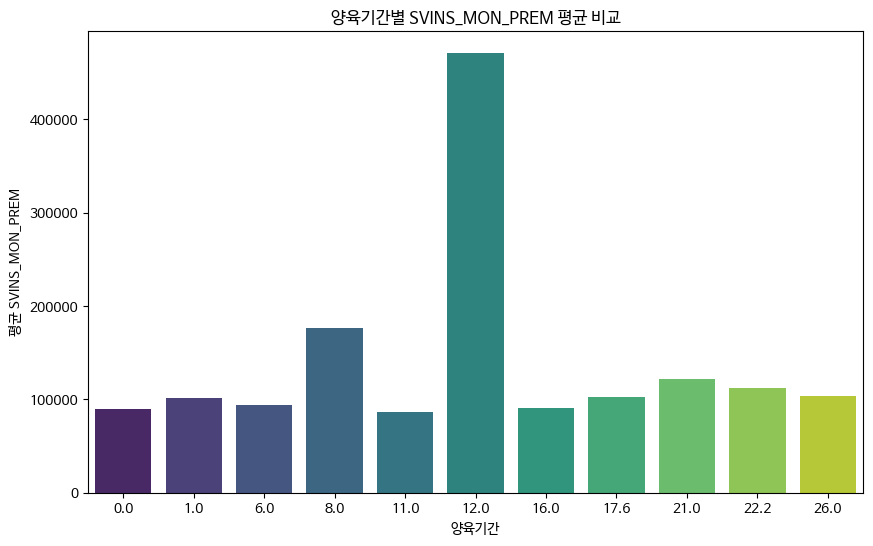

In [74]:
# '양육기간'과 'SVINS_MON_PREM' 열 선택
selected_columns = ['양육기간', 'SVINS_MON_PREM']
df_selected = df_merge[selected_columns]

# '양육기간'별 'SVINS_MON_PREM'의 평균 계산
average_premium_by_duration = df_selected.groupby('양육기간')['SVINS_MON_PREM'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='양육기간', y='SVINS_MON_PREM', data=average_premium_by_duration, palette='viridis')
plt.title('양육기간별 SVINS_MON_PREM 평균 비교')
plt.xlabel('양육기간')
plt.ylabel('평균 SVINS_MON_PREM')
plt.show()

* 양육기간이 30년 기준 12년 남았을때의 평균 연금저축상품 납입 보험료가 높다

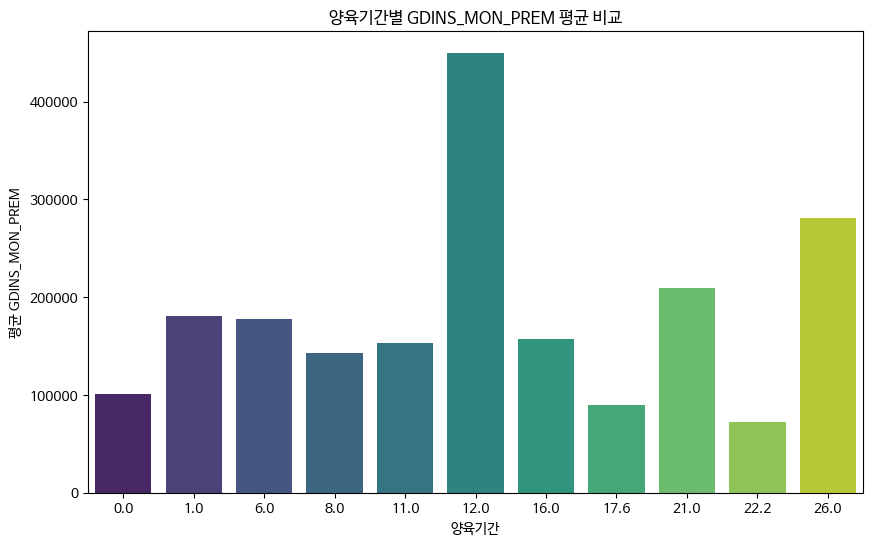

In [39]:
# '양육기간'과 'SVINS_MON_PREM' 열 선택
selected_columns = ['양육기간', 'GDINS_MON_PREM']
df_selected = df_merge[selected_columns]

# '양육기간'별 'SVINS_MON_PREM'의 평균 계산
average_premium_by_duration = df_selected.groupby('양육기간')['GDINS_MON_PREM'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='양육기간', y='GDINS_MON_PREM', data=average_premium_by_duration, palette='viridis')
plt.title('양육기간별 GDINS_MON_PREM 평균 비교')
plt.xlabel('양육기간')
plt.ylabel('평균 GDINS_MON_PREM')
plt.show()

* 양육기간이 30년 기준 12년 남았을때의 평균 비연금저축상품 납입 보험료가 높다

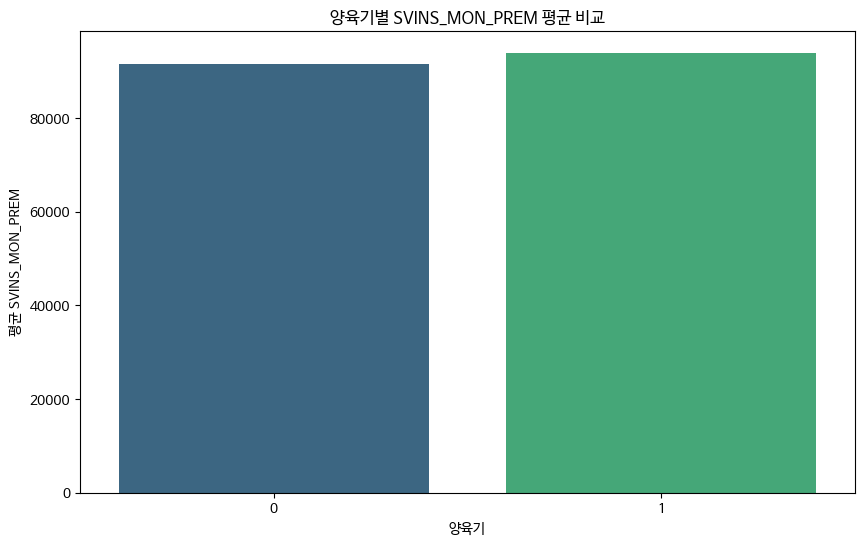

In [38]:
# '양육기'과 'SVINS_MON_PREM' 열 선택
selected_columns = ['양육기', 'SVINS_MON_PREM']
df_selected = df_merge[selected_columns]

# '양육기'별 'SVINS_MON_PREM'의 평균 계산
average_premium_by_duration = df_selected.groupby('양육기')['SVINS_MON_PREM'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='양육기', y='SVINS_MON_PREM', data=average_premium_by_duration, palette='viridis')
plt.title('양육기별 SVINS_MON_PREM 평균 비교')
plt.xlabel('양육기')
plt.ylabel('평균 SVINS_MON_PREM')
plt.show()

* 20세 기준 양육기와 비양육기의 비연금저축상품 납입 보험료는 양육기가 아주 살짝 더 높지만 유의미하다고 보이지는 않는다

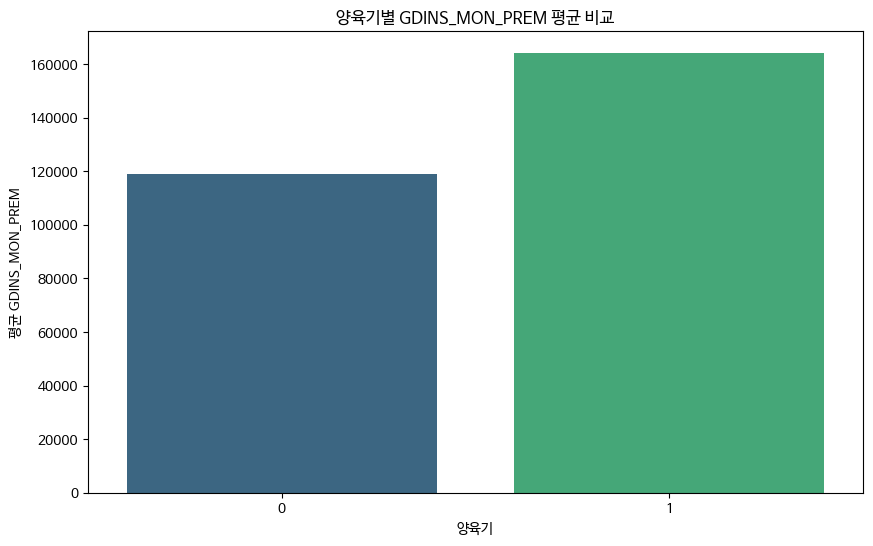

In [40]:
# '양육기'과 'SVINS_MON_PREM' 열 선택
selected_columns = ['양육기', 'GDINS_MON_PREM']
df_selected = df_merge[selected_columns]

# '양육기'별 'SVINS_MON_PREM'의 평균 계산
average_premium_by_duration = df_selected.groupby('양육기')['GDINS_MON_PREM'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='양육기', y='GDINS_MON_PREM', data=average_premium_by_duration, palette='viridis')
plt.title('양육기별 GDINS_MON_PREM 평균 비교')
plt.xlabel('양육기')
plt.ylabel('평균 GDINS_MON_PREM')
plt.show()

* 20세 기준 양육기와 비양육기의 비연금저축상품 납입 보험료는 

In [41]:
average_premium_by_duration

,양육기,GDINS_MON_PREM
0,0,118839.692644
1,1,164269.695587


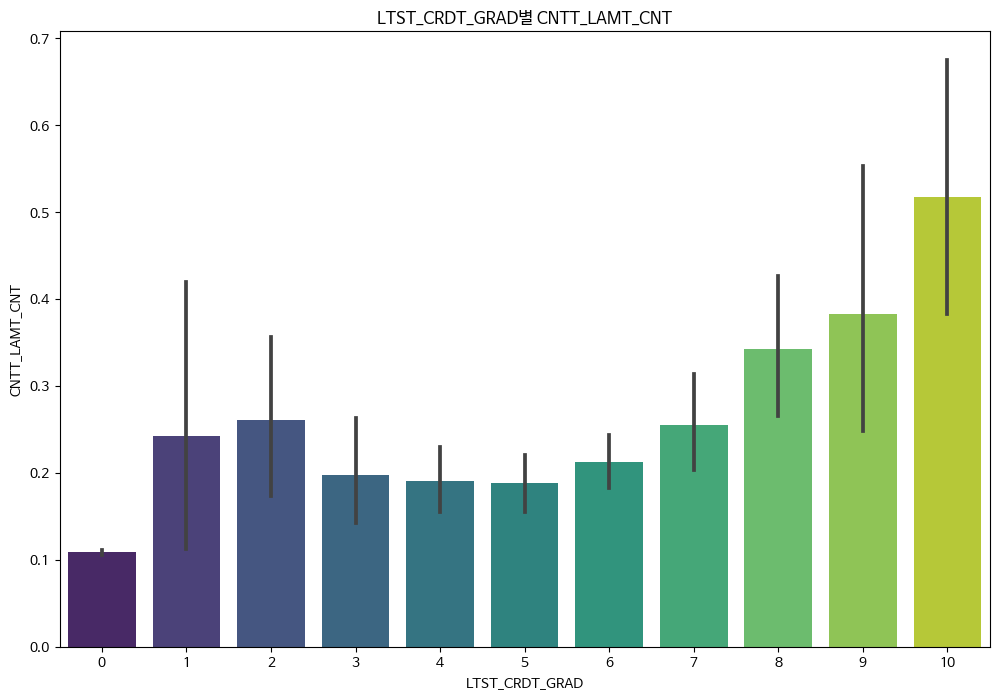

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='LTST_CRDT_GRAD', y='CNTT_LAMT_CNT', data=df_merge, palette='viridis')
plt.title('LTST_CRDT_GRAD별 CNTT_LAMT_CNT')
plt.xlabel('LTST_CRDT_GRAD')
plt.ylabel('CNTT_LAMT_CNT')
plt.show()

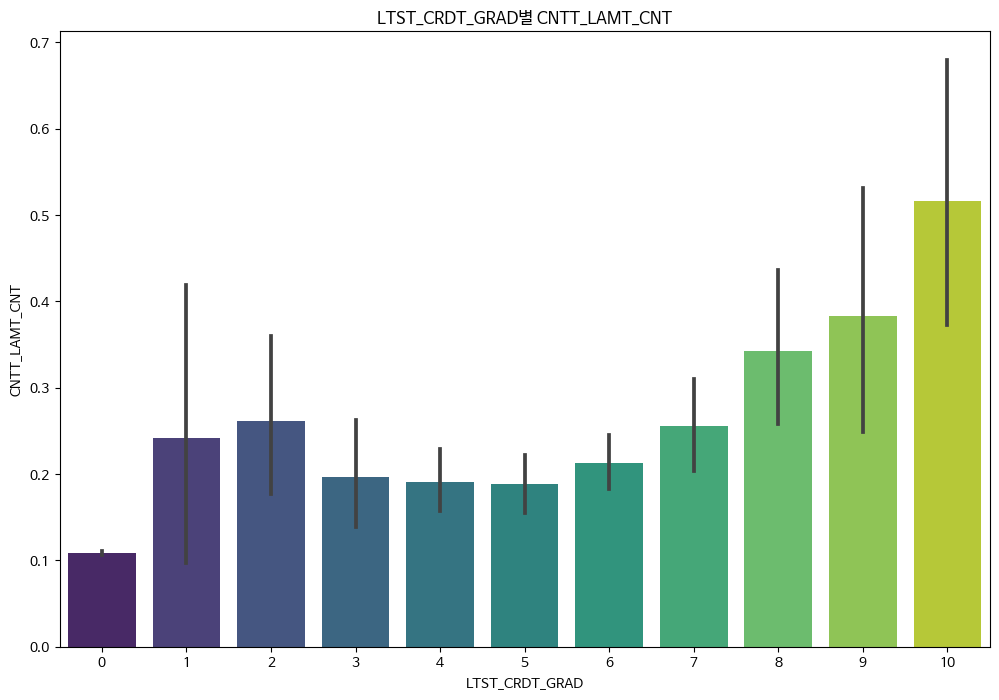

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='LTST_CRDT_GRAD', y='CNTT_LAMT_CNT', data=df_merge, palette='viridis')
plt.title('LTST_CRDT_GRAD별 CNTT_LAMT_CNT')
plt.xlabel('LTST_CRDT_GRAD')
plt.ylabel('CNTT_LAMT_CNT')
plt.show()

In [44]:
df_merge.groupby('OCCP_NAME_G')[['BNK_LNIF_CNT','CPT_LNIF_CNT','SPART_LNIF_CNT','ECT_LNIF_CNT']].mean()

,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT
OCCP_NAME_G,,,,
1차산업 종사자,0.826825,0.519525,0.954160,0.451613
2차산업 종사자,0.840433,0.499115,0.960317,0.486199
3차산업 종사자,0.836133,0.495952,0.956375,0.485438
고소득 전문직,0.863451,0.457073,0.889616,0.466885
공무원,0.856020,0.497545,0.938519,0.468867
기업/단체 임원,0.833814,0.461095,0.972142,0.539866
기타,0.779306,0.475478,0.961722,0.498804
단순 노무직,0.873325,0.465286,0.917174,0.468940
단순 사무직,0.863404,0.518627,0.943024,0.458486


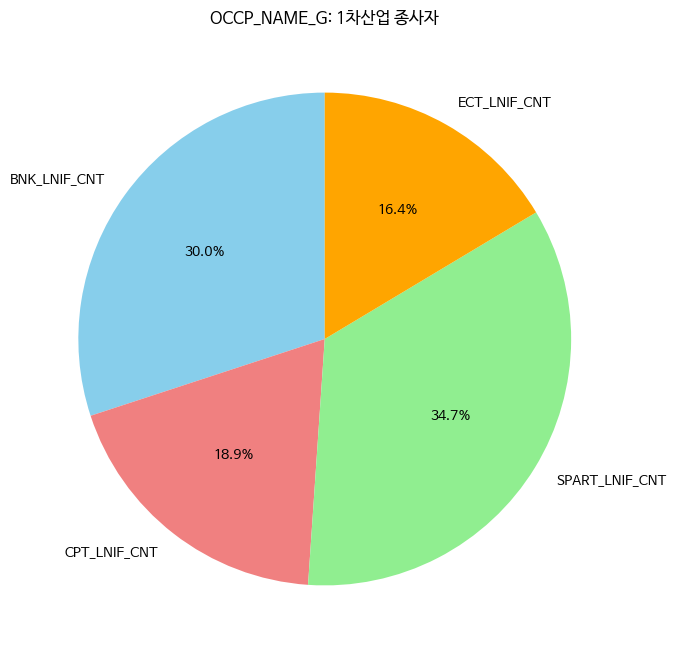

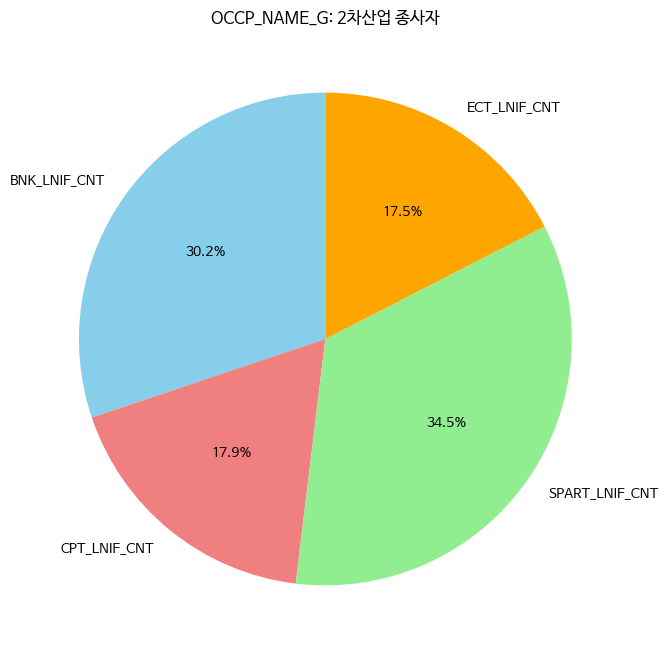

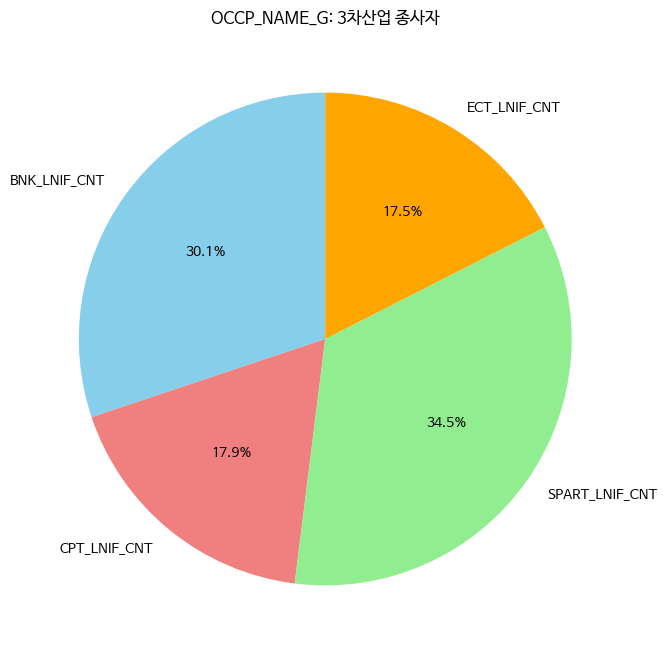

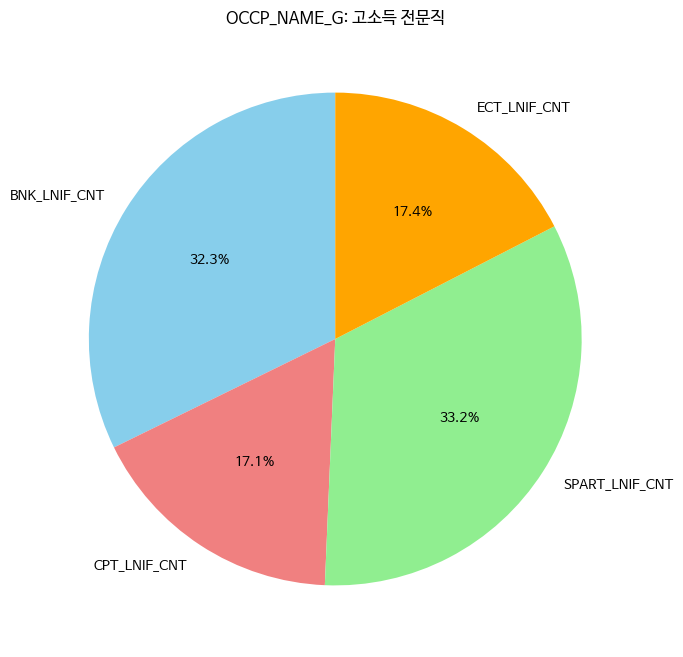

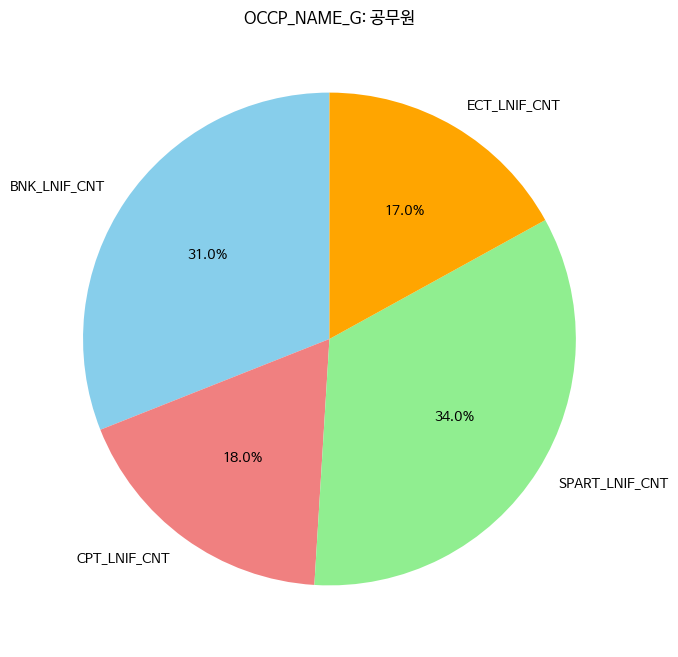

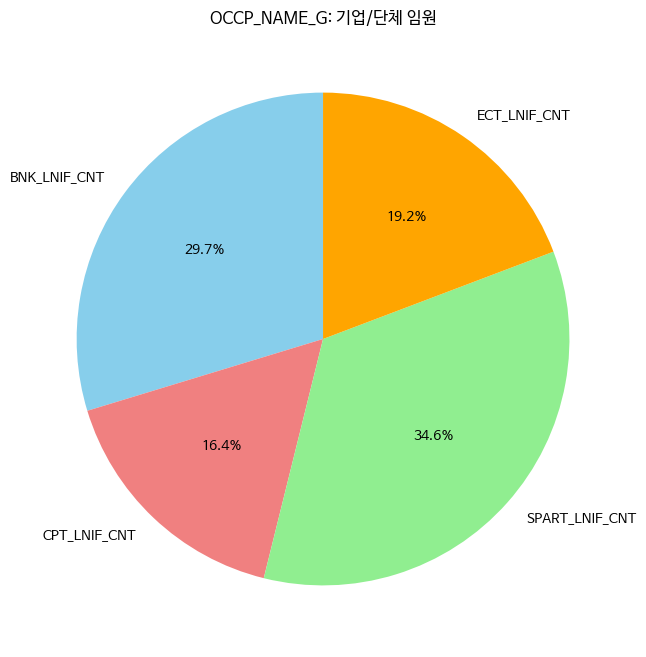

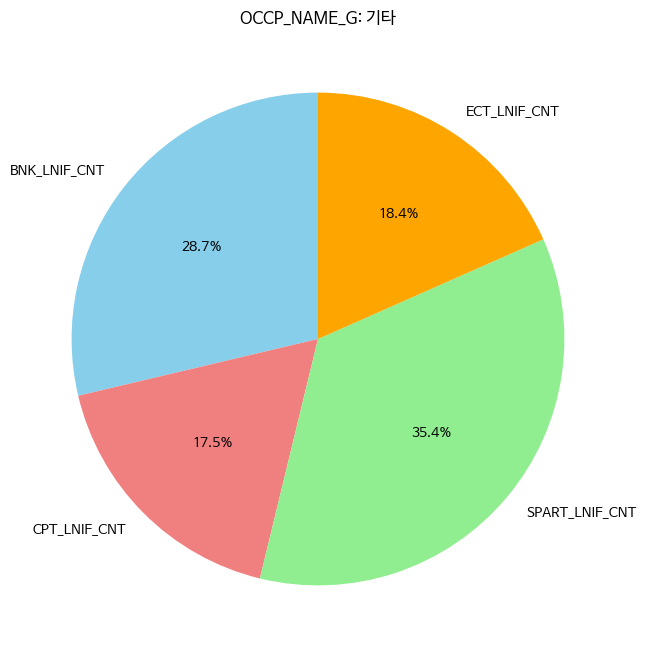

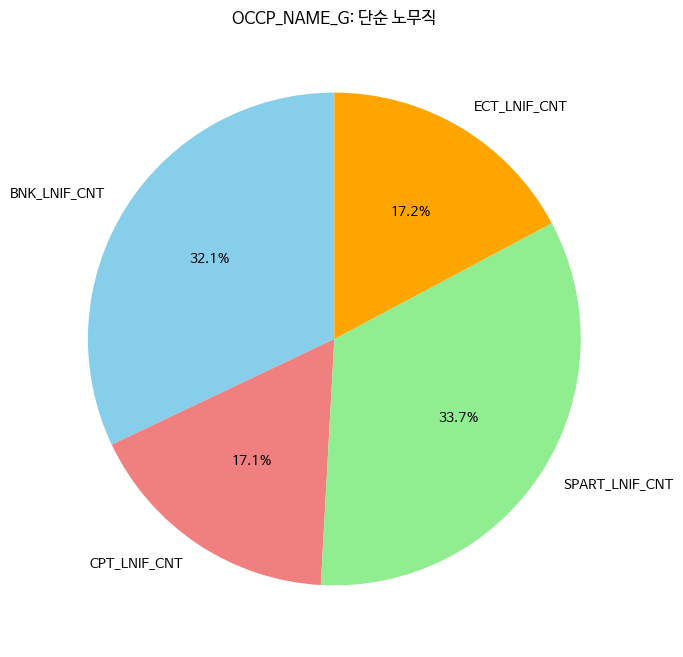

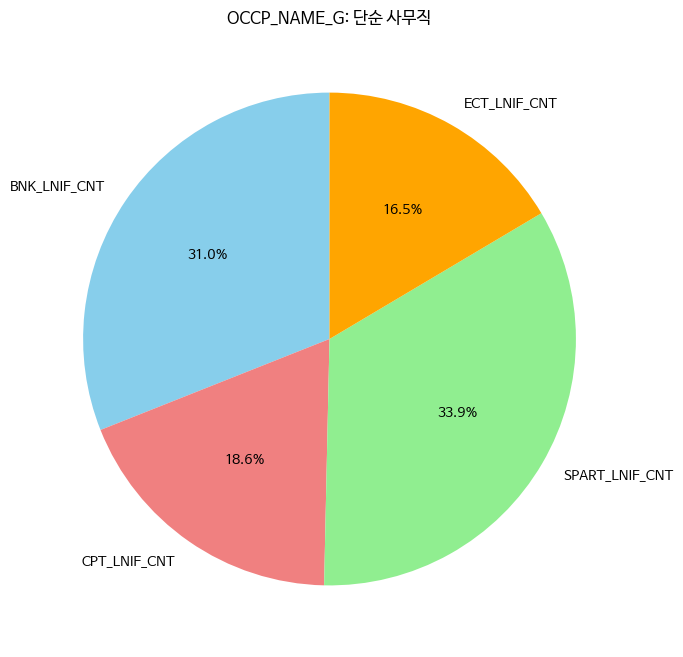

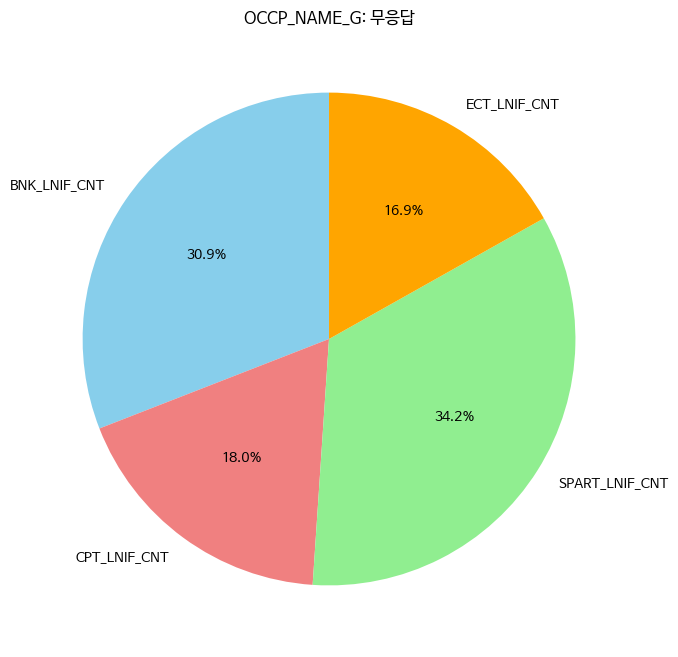

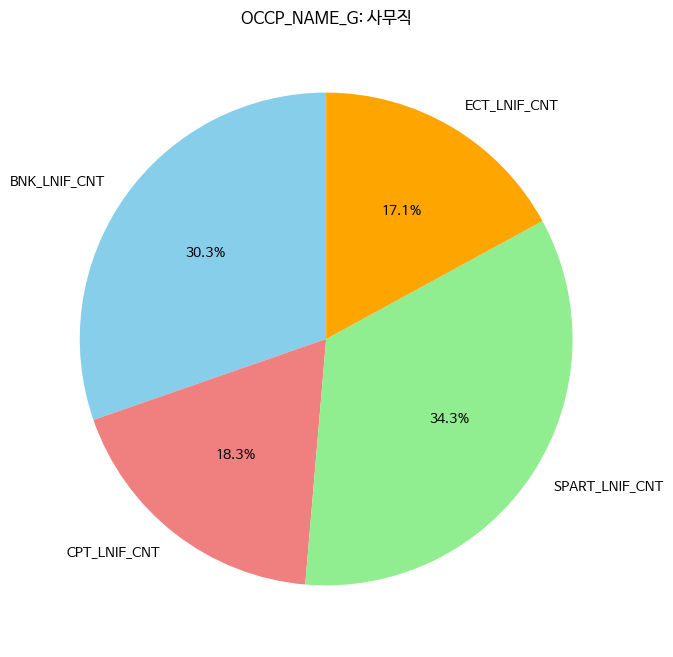

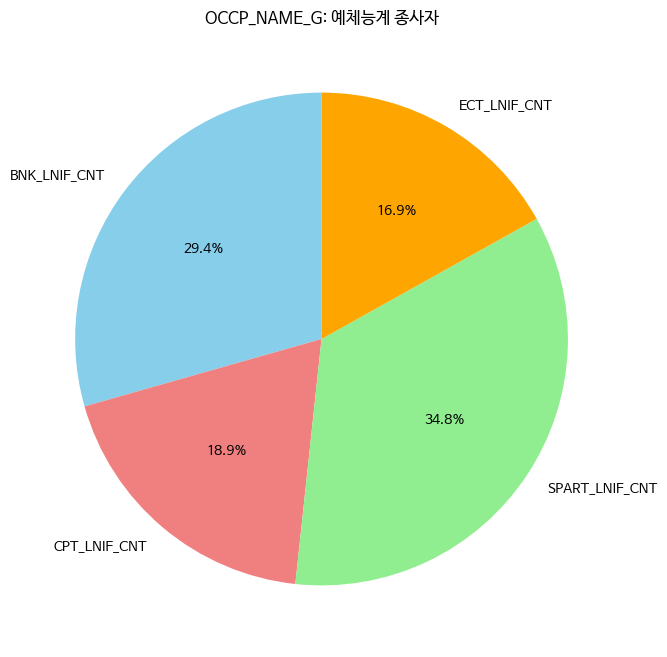

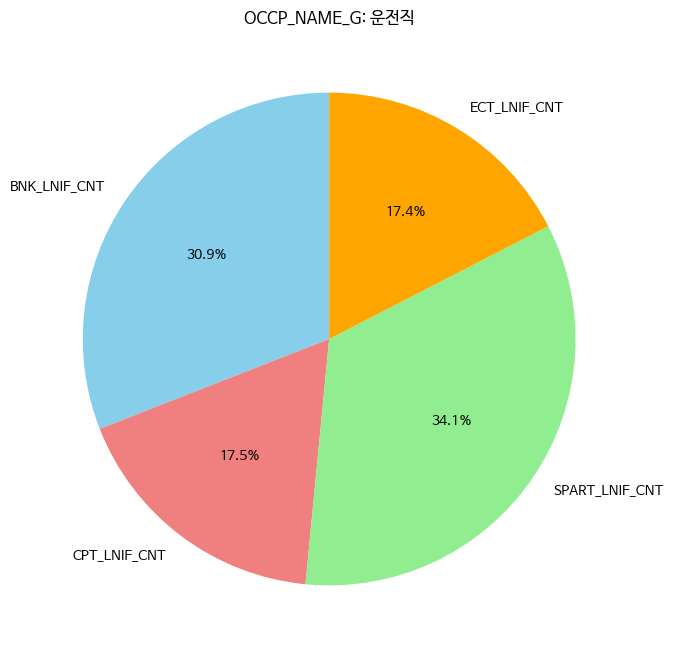

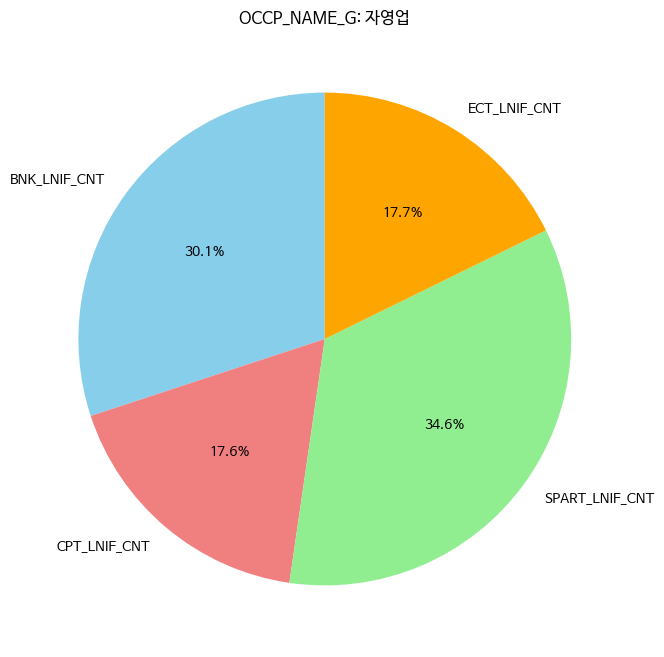

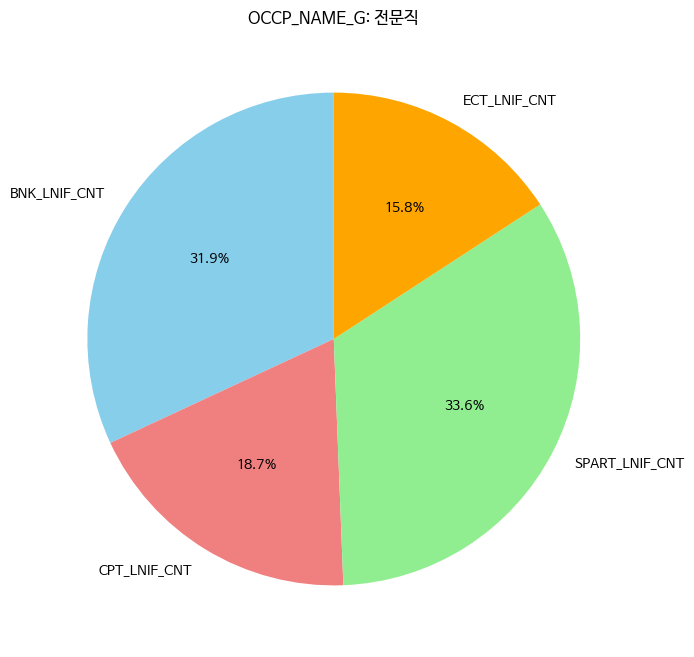

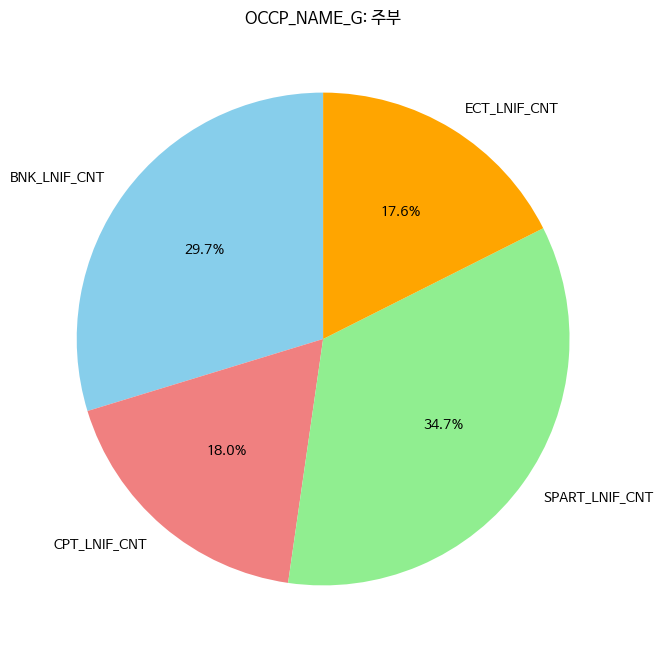

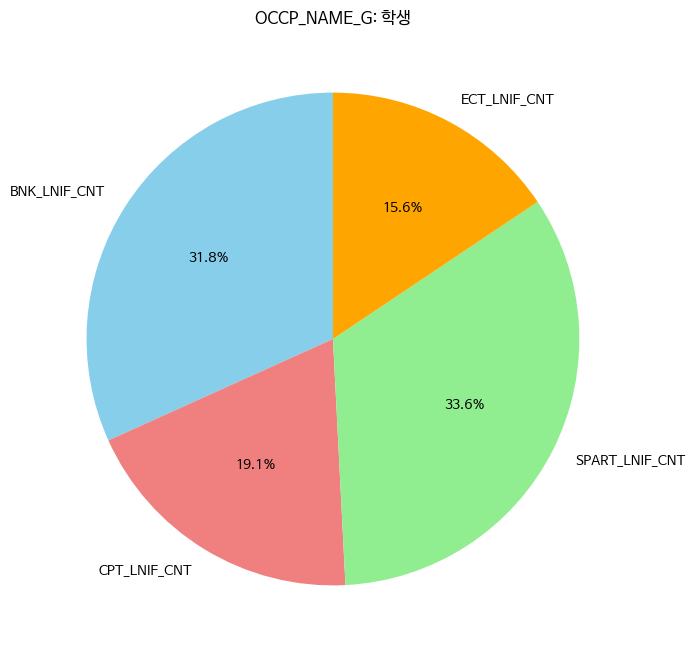

In [45]:
average_counts_by_occupation = df_merge.groupby('OCCP_NAME_G')[['BNK_LNIF_CNT','CPT_LNIF_CNT','SPART_LNIF_CNT','ECT_LNIF_CNT']].mean()

# 파이 차트 그리기
for index, row in average_counts_by_occupation.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    plt.title(f'OCCP_NAME_G: {index}')
    plt.show()


#### 해지유무에 따른 변수 분포

In [198]:
df = df_merge.copy()

In [199]:
df.columns

Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'OCCP_NAME_G',
       'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM',
       'LAST_CHLD_AGE', 'MATE_OCCP_NAME_G', 'MATE_JOB_INCM', 'CRDT_LOAN_CNT',
       'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE',
       'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE', 'STRT_CRDT_GRAD',
       'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE', 'AVG_STLN_RATE',
       'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM',
       'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT',
       'FMLY_PLPY_CNT', 'AGE', 'SEX', '양육기', '

In [79]:
# 결측값을 KNN보간법으로 처리하기 위하여 변수들간 상관관계 확인
df.corr()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,양육기,양육기간
CUST_ID,1.000000,-0.001467,0.003884,0.002802,0.000186,-0.003928,-0.001534,-0.003953,0.006172,0.002475,...,0.004400,0.004239,-0.000671,0.001812,0.000274,-0.000990,0.001335,0.002970,-0.003434,-0.004069
TARGET,-0.001467,1.000000,-0.087495,0.114606,0.158203,0.113226,-0.072449,-0.025097,-0.088807,0.034692,...,-0.005785,-0.005313,0.031527,0.050578,0.070570,-0.003092,0.000290,-0.033047,0.003289,0.004431
BNK_LNIF_CNT,0.003884,-0.087495,1.000000,-0.161612,-0.293626,-0.274249,0.259844,0.106416,0.481082,-0.076379,...,0.002574,0.003982,0.001098,-0.001376,-0.007334,-0.002248,-0.004035,0.009693,0.012622,0.013674
CPT_LNIF_CNT,0.002802,0.114606,-0.161612,1.000000,0.792920,0.081750,-0.053021,-0.015898,-0.125971,0.514460,...,-0.009909,-0.011115,0.004765,0.000618,0.008867,-0.004914,0.002167,-0.011574,0.019080,0.018947
SPART_LNIF_CNT,0.000186,0.158203,-0.293626,0.792920,1.000000,0.656105,0.045922,0.092217,-0.193214,0.403575,...,-0.003955,-0.008364,0.007889,0.003732,0.016576,0.001433,0.009637,-0.000113,0.011130,0.012832
ECT_LNIF_CNT,-0.003928,0.113226,-0.274249,0.081750,0.656105,1.000000,0.148575,0.186117,-0.165077,0.035278,...,0.005005,0.000046,0.006409,0.005070,0.016330,0.007712,0.011737,0.012531,-0.002994,-0.000441
TOT_LNIF_AMT,-0.001534,-0.072449,0.259844,-0.053021,0.045922,0.148575,1.000000,0.626025,0.721521,0.108900,...,0.007118,0.001131,-0.000731,-0.008058,-0.012514,0.000146,0.002648,0.016260,0.000350,0.003865
TOT_CLIF_AMT,-0.003953,-0.025097,0.106416,-0.015898,0.092217,0.186117,0.626025,1.000000,0.278580,0.132456,...,0.008851,0.006453,-0.005708,-0.004740,-0.002695,0.002772,0.005171,0.005407,-0.007594,-0.005462
BNK_LNIF_AMT,0.006172,-0.088807,0.481082,-0.125971,-0.193214,-0.165077,0.721521,0.278580,1.000000,-0.018556,...,0.003033,0.000625,0.001207,-0.007993,-0.009763,-0.004843,-0.002145,0.013566,0.006960,0.010169
CPT_LNIF_AMT,0.002475,0.034692,-0.076379,0.514460,0.403575,0.035278,0.108900,0.132456,-0.018556,1.000000,...,-0.004922,-0.006521,0.002998,0.000052,-0.001438,-0.004761,0.001642,-0.006944,0.010114,0.010329


대출 연체 여부

<Axes: xlabel='TARGET', ylabel='Count'>

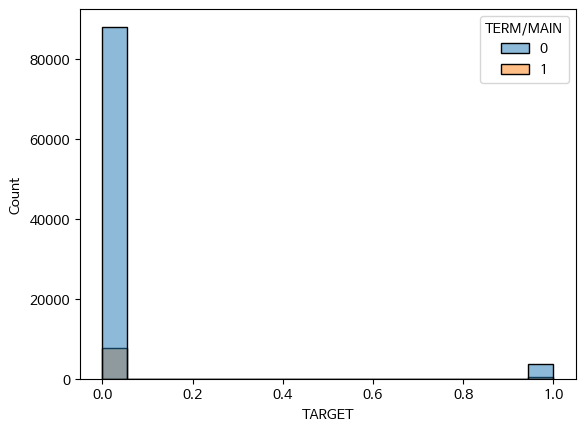

In [200]:
sns.histplot(x ='TARGET',data=df, hue='TERM/MAIN')

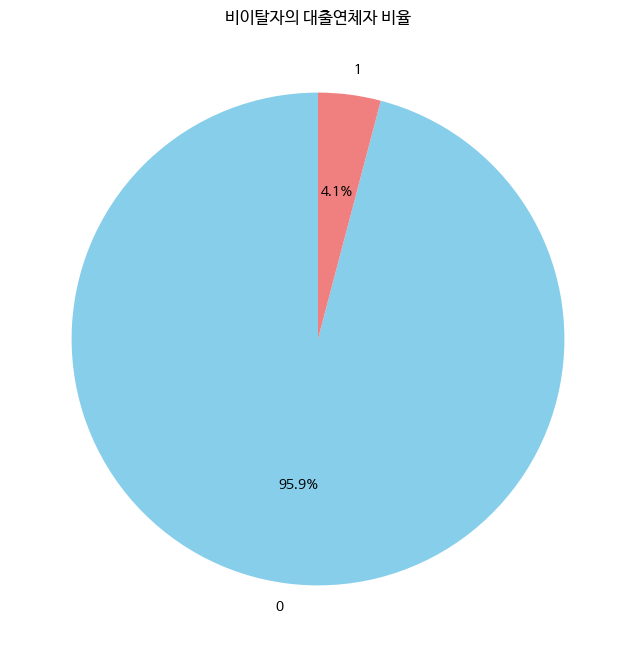

In [201]:
# 'TERM/MAIN'이 0일 때의 'TARGET'의 0과 1의 비율 계산
target_ratio = df_merge[df_merge['TERM/MAIN'] == 0]['TARGET'].value_counts(normalize=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(target_ratio, labels=target_ratio.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('비이탈자의 대출연체자 비율')
plt.show()

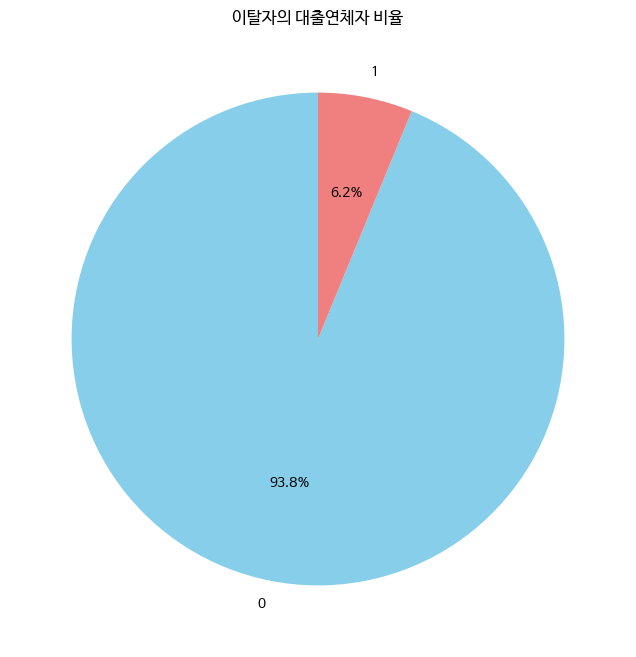

In [202]:
# 'TERM/MAIN'이 1의 때의 'TARGET'의 0과 1의 비율 계산
target_ratio = df_merge[df_merge['TERM/MAIN'] == 1]['TARGET'].value_counts(normalize=True)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(target_ratio, labels=target_ratio.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('이탈자의 대출연체자 비율')
plt.show()

* 이탈자의 연체율이 2.1% 더 높음

In [180]:
target_ratio_by_term_main

TARGET,0,1
TERM/MAIN,,
0,0.958982,0.041018
1,0.937883,0.062117


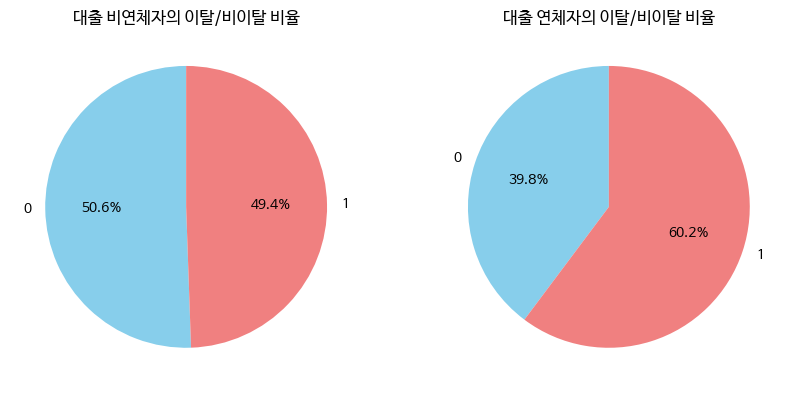

In [203]:
# 'TERM/MAIN' 값에 따른 'TARGET'의 0과 1의 비율 계산
target_ratio_by_term_main = df_merge.groupby('TERM/MAIN')['TARGET'].value_counts(normalize=True).unstack()

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 'TARGET'이 0인 파이 차트
plt.subplot(1, 2, 1)
plt.pie(target_ratio_by_term_main[0], labels=target_ratio_by_term_main.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('대출 비연체자의 이탈/비이탈 비율')

# 'TARGET'이 1인 파이 차트
plt.subplot(1, 2, 2)
plt.pie(target_ratio_by_term_main[1], labels=target_ratio_by_term_main.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('대출 연체자의 이탈/비이탈 비율')

plt.show()

* 연제자의 이탈 비율이 약 20% 높다

##### 개인별 금융권 이용현황 분석

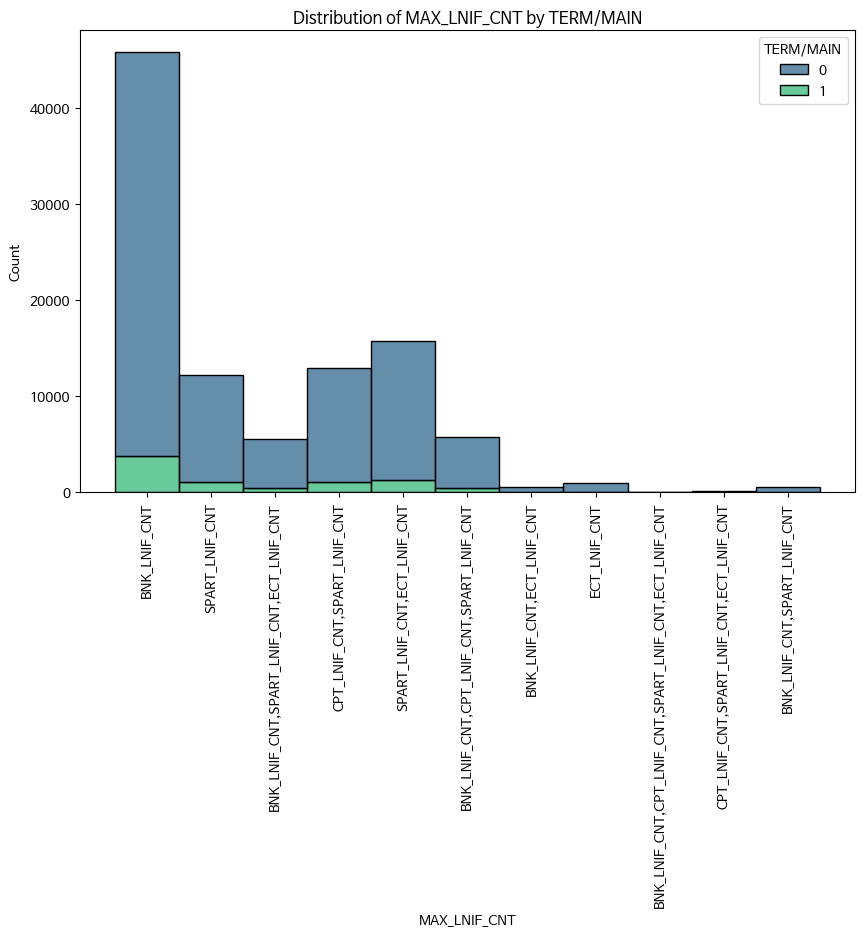

In [206]:

# 'TERM/MAIN' 값에 따른 'MAX_LNIF_CNT' 분포를 확인하기 위한 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merge, x='MAX_LNIF_CNT', hue='TERM/MAIN', multiple='stack', palette='viridis')

# x축 레이블을 45도 회전
plt.xticks(rotation=90)

plt.title('Distribution of MAX_LNIF_CNT by TERM/MAIN')
plt.xlabel('MAX_LNIF_CNT')
plt.ylabel('Count')
plt.show()

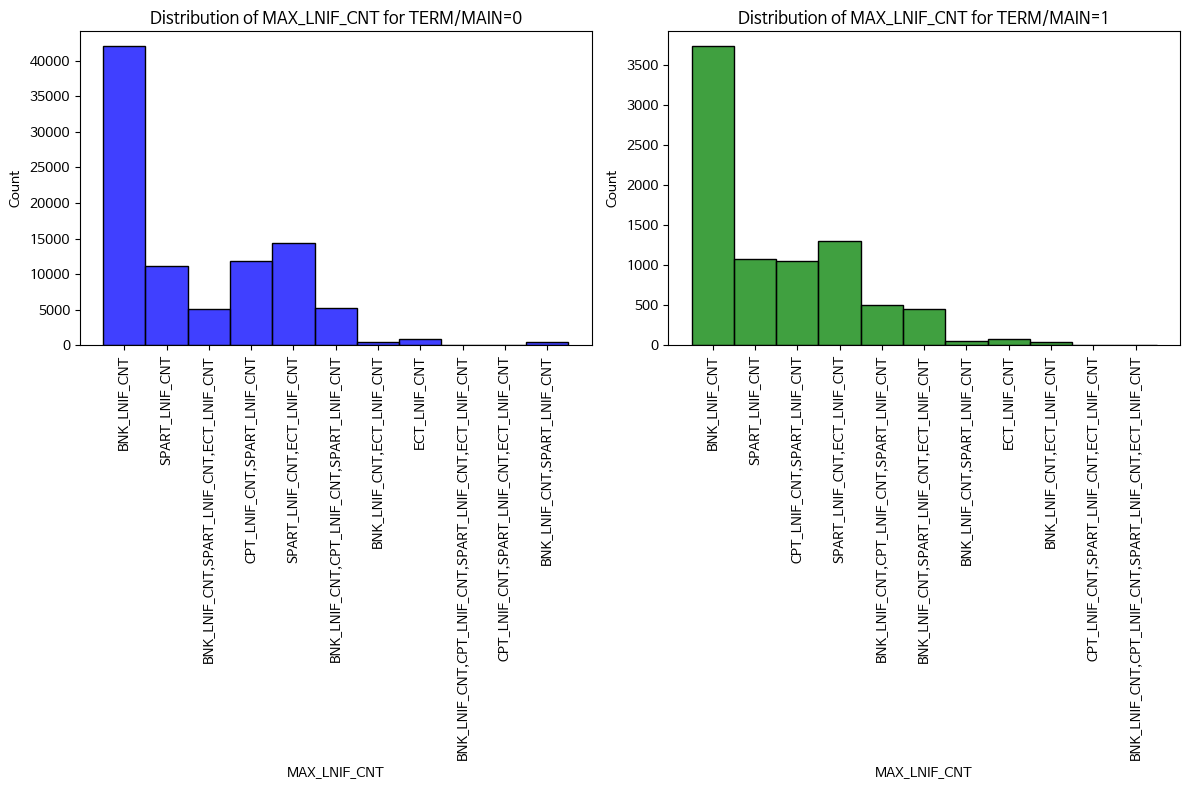

In [220]:
# 'TERM/MAIN' 값이 0인 경우의 'MAX_LNIF_CNT' 분포
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.histplot(data=df_merge[df_merge['TERM/MAIN'] == 0], x='MAX_LNIF_CNT', color='blue', bins=20)
plt.xticks(rotation=90)
plt.title('Distribution of MAX_LNIF_CNT for TERM/MAIN=0')
plt.xlabel('MAX_LNIF_CNT')
plt.ylabel('Count')

# 'TERM/MAIN' 값이 1인 경우의 'MAX_LNIF_CNT' 분포
plt.subplot(1, 2, 2)
sns.histplot(data=df_merge[df_merge['TERM/MAIN'] == 1], x='MAX_LNIF_CNT', color='green', bins=20)
plt.xticks(rotation=90)
plt.title('Distribution of MAX_LNIF_CNT for TERM/MAIN=1')
plt.xlabel('MAX_LNIF_CNT')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

* 이탈 유무에 관계없이 은행권에서 가장 많은 대출이 발생, 2산업분류와 기타기관 모두 사용한 비율이 2번째로 높음
* 3번째로는 이탈유무에 관계없이 2산업분류와 캐피탈을 동시에 이용하거나 2산업분류만 이용한 고객이 많음
* 전채적으로 대출기관에 따른 분포는 큰 영향을 미치지 않는다는것을 알 수 있다.

##### 대출금액에 따른 이탈자유무 분석

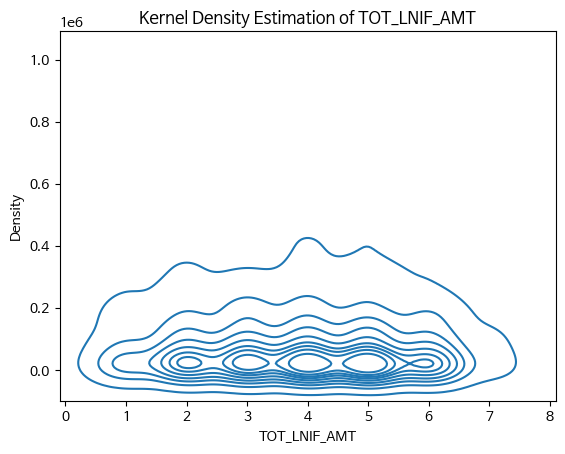

In [254]:
sns.kdeplot(x=df[df['STRT_CRDT_GRAD']!=0]['STRT_CRDT_GRAD'] ,y= df['TOT_LNIF_AMT'], shade=False)
plt.title('Kernel Density Estimation of TOT_LNIF_AMT')
plt.xlabel('TOT_LNIF_AMT')
plt.ylabel('Density')
plt.show()

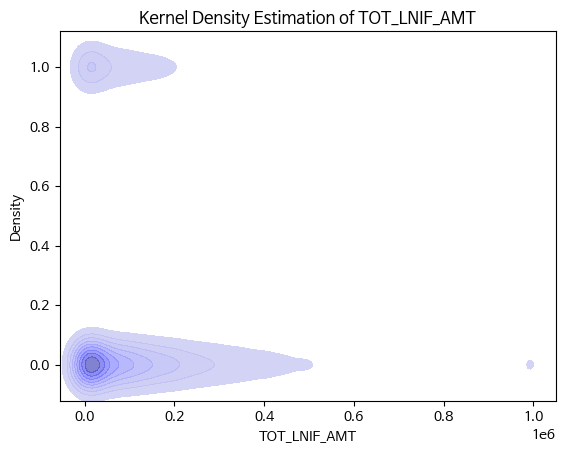

In [250]:
sns.kdeplot(x=df['TOT_LNIF_AMT'] ,y= df['TERM/MAIN'], fill=True, color='blue', alpha=0.7)
plt.title('Kernel Density Estimation of TOT_LNIF_AMT')
plt.xlabel('TOT_LNIF_AMT')
plt.ylabel('Density')
plt.show()

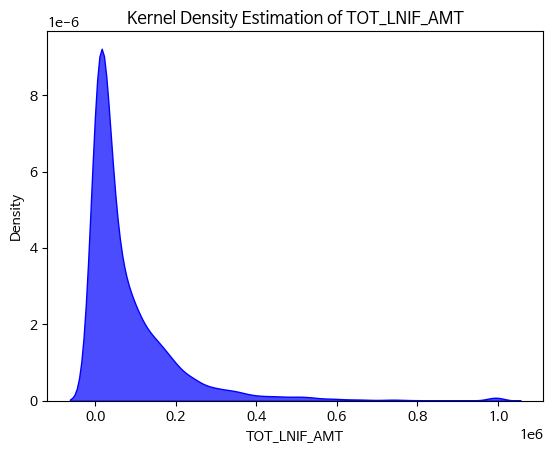

In [247]:
sns.kdeplot(df[df['TERM/MAIN']==1]['TOT_LNIF_AMT'], fill=True, color='blue', alpha=0.7)
plt.title('Kernel Density Estimation of TOT_LNIF_AMT')
plt.xlabel('TOT_LNIF_AMT')
plt.ylabel('Density')
plt.show()

In [ ]:
sns.barplot(data=df, x='MAX_LNIF_CNT',y=, color='blue', bins=20)

In [227]:
df.groupby('TERM/MAIN')['TOT_LNIF_AMT'].mean()

TERM/MAIN
0    83967.380154
1    84876.045056
Name: TOT_LNIF_AMT, dtype: float64

In [243]:
df.loc[(df['TOT_LNIF_AMT'] != 0) & (df['TERM/MAIN']==0)]['TOT_LNIF_AMT'].mean()

83967.38015449897

In [244]:
df.loc[(df['TOT_LNIF_AMT'] != 0) & (df['TERM/MAIN']==1)]['TOT_LNIF_AMT'].mean()

84876.04505586928

* 모르겠다

##### 이탈자

In [259]:
df_1 =  df[df['TERM/MAIN']==1]
df_0 =  df[df['TERM/MAIN']==0]

<Axes: xlabel='AGE', ylabel='Count'>

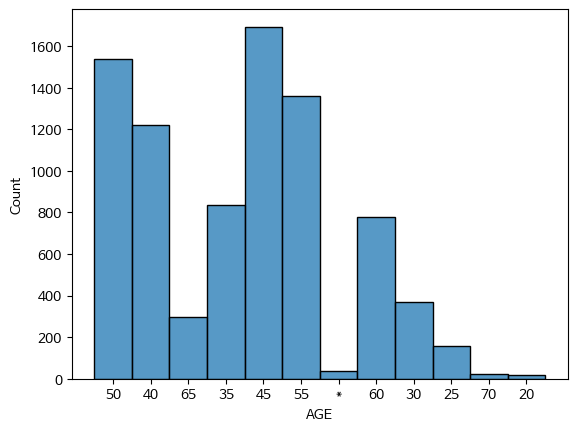

In [260]:
sns.histplot(df_1['AGE'])

<Axes: xlabel='AGE', ylabel='Count'>

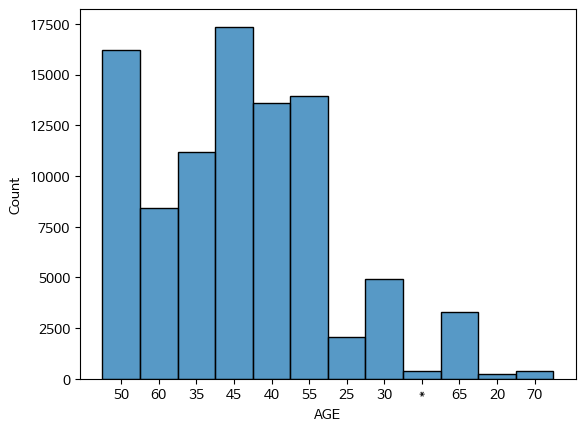

In [261]:
sns.histplot(df_0['AGE'])

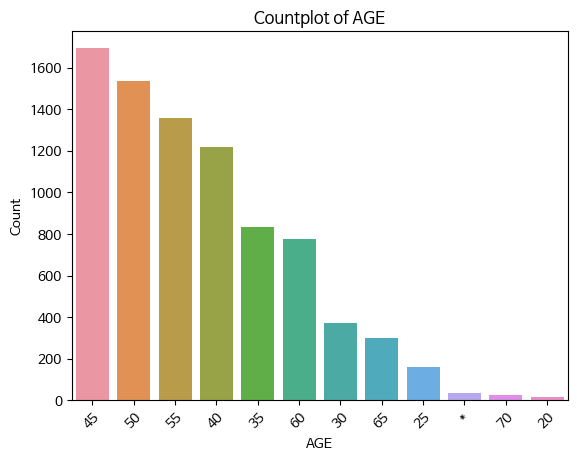

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 AGE 열을 countplot으로 그리기
sns.countplot(data=df_1, x='AGE', order=df['AGE'].value_counts().index)

# x축 레이블 및 제목 설정
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Countplot of AGE')

# 그래프 표시
plt.xticks(rotation=45)
plt.show()


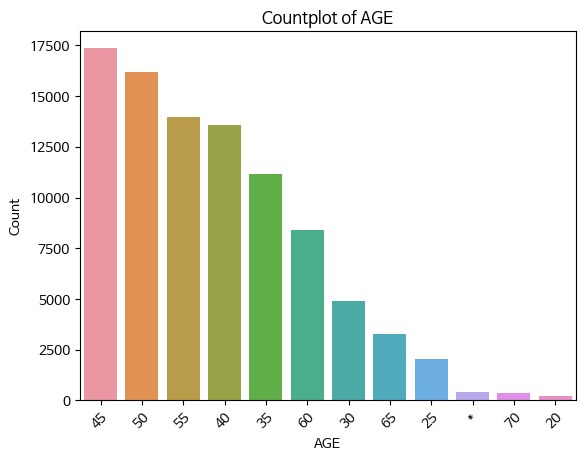

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 AGE 열을 countplot으로 그리기
sns.countplot(data=df_0, x='AGE', order=df['AGE'].value_counts().index)

# x축 레이블 및 제목 설정
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Countplot of AGE')

# 그래프 표시
plt.xticks(rotation=45)
plt.show()


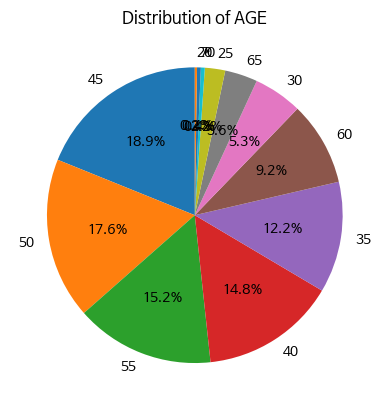

In [273]:
# AGE 컬럼의 값 카운트
age_counts = df_0['AGE'].value_counts()

# 파이차트 그리기
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)

# 차트 제목 설정
plt.title('Distribution of AGE')

# 그래프 표시
plt.show()

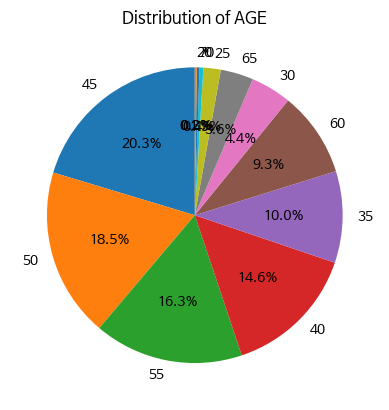

In [272]:
# AGE 컬럼의 값 카운트
age_counts = df_1['AGE'].value_counts()

# 파이차트 그리기
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)

# 차트 제목 설정
plt.title('Distribution of AGE')

# 그래프 표시
plt.show()

([<matplotlib.patches.Wedge at 0x7f4411aa53f0>,
 [Text(-1.0576978776512584, 0.30211785715515665, '0'),
  Text(1.0576978776512584, -0.30211785715515677, '1')],
 [Text(-0.5769261150825046, 0.16479155844826723, '91.1%'),
  Text(0.5769261150825046, -0.1647915584482673, '8.9%')])

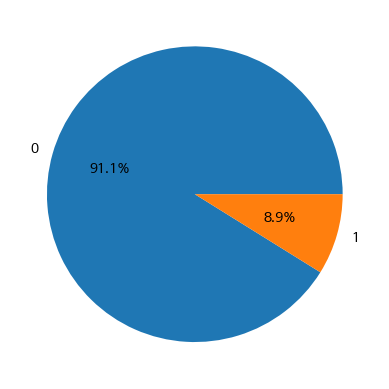

In [288]:
plt.pie(df[df['TOT_LNIF_AMT']<1000]['TERM/MAIN'].value_counts(), labels=[0,1], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f441e38f340>,
 [Text(-1.0620797540540774, 0.286333015959443, '0'),
  Text(1.0620797540540774, -0.2863330159594431, '1')],
 [Text(-0.5793162294840422, 0.15618164506878707, '91.6%'),
  Text(0.5793162294840422, -0.15618164506878715, '8.4%')])

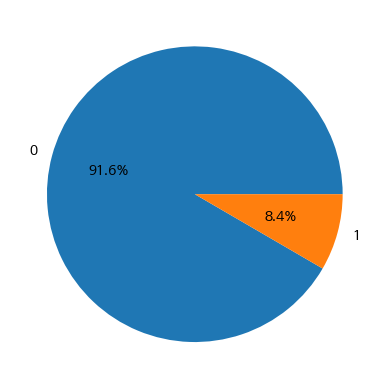

In [311]:
plt.pie(df[df['TOT_LNIF_AMT']<0000]['TERM/MAIN'].value_counts(), labels=[0,1], autopct='%1.1f%%')

In [282]:
df['TOT_CLIF_AMT'].max()

994001

가족원수

In [314]:
df[df['CUST_JOB_INCM']==0]['OCCP_NAME_G'].value_counts()

주부          27516
학생           3808
기타           1672
자영업          1525
사무직          1140
3차산업 종사자     1016
2차산업 종사자      965
무응답           521
공무원           479
1차산업 종사자      364
운전직           355
단순 노무직        282
전문직           235
기업/단체 임원      155
고소득 전문직       152
예체능계 종사자       94
단순 사무직         59
Name: OCCP_NAME_G, dtype: int64

In [ ]:
df['ACTL_FMLY_NUM']

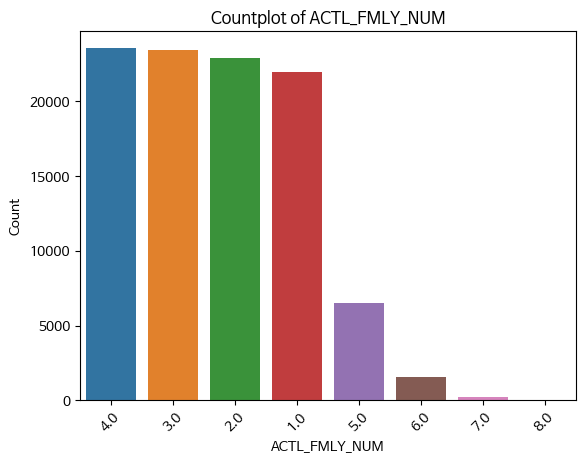

In [316]:
# 데이터프레임의 AGE 열을 countplot으로 그리기
sns.countplot(data=df, x='ACTL_FMLY_NUM', order=df['ACTL_FMLY_NUM'].value_counts().index)

# x축 레이블 및 제목 설정
plt.xlabel('ACTL_FMLY_NUM')
plt.ylabel('Count')
plt.title('Countplot of ACTL_FMLY_NUM')

# 그래프 표시
plt.xticks(rotation=45)
plt.show()


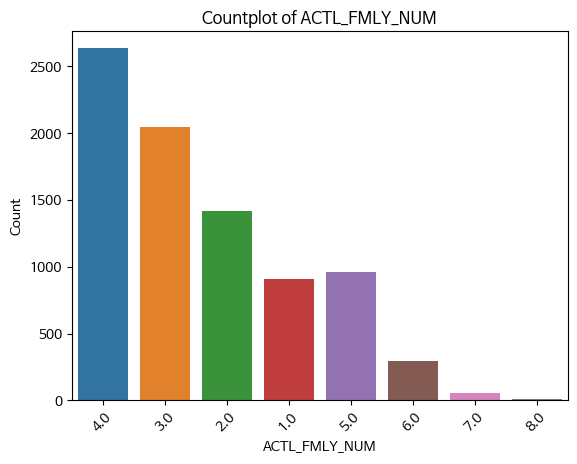

In [318]:
# 데이터프레임의 AGE 열을 countplot으로 그리기
sns.countplot(data=df_1, x='ACTL_FMLY_NUM', order=df['ACTL_FMLY_NUM'].value_counts().index)

# x축 레이블 및 제목 설정
plt.xlabel('ACTL_FMLY_NUM')
plt.ylabel('Count')
plt.title('Countplot of ACTL_FMLY_NUM')

# 그래프 표시
plt.xticks(rotation=45)
plt.show()

In [324]:
df_0['ACTL_FMLY_NUM'].value_counts()

2.0    21496
3.0    21399
1.0    21047
4.0    20909
5.0     5531
6.0     1302
7.0      196
8.0       30
Name: ACTL_FMLY_NUM, dtype: int64

In [323]:
df_1['ACTL_FMLY_NUM'].value_counts()

4.0    2633
3.0    2045
2.0    1414
5.0     959
1.0     906
6.0     297
7.0      59
8.0      10
Name: ACTL_FMLY_NUM, dtype: int64

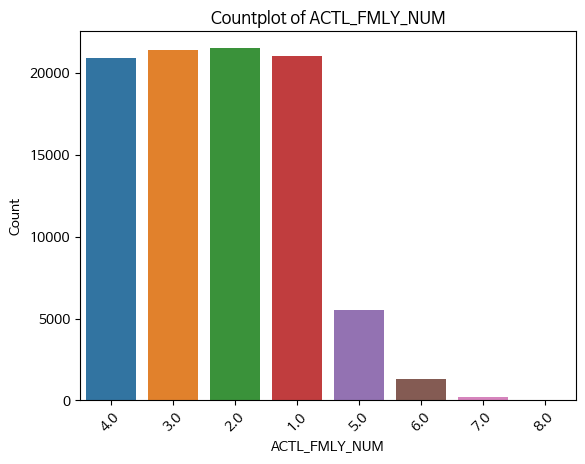

In [319]:
# 데이터프레임의 AGE 열을 countplot으로 그리기
sns.countplot(data=df_0, x='ACTL_FMLY_NUM', order=df['ACTL_FMLY_NUM'].value_counts().index)

# x축 레이블 및 제목 설정
plt.xlabel('ACTL_FMLY_NUM')
plt.ylabel('Count')
plt.title('Countplot of ACTL_FMLY_NUM')

# 그래프 표시
plt.xticks(rotation=45)
plt.show()


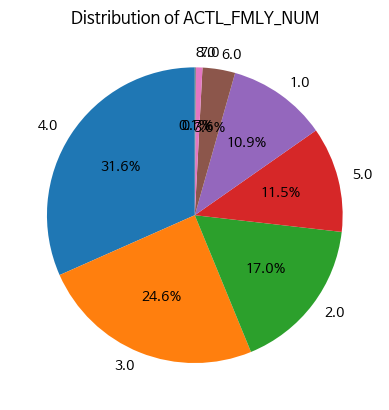

In [320]:
# AGE 컬럼의 값 카운트
age_counts = df_1['ACTL_FMLY_NUM'].value_counts()

# 파이차트 그리기
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)

# 차트 제목 설정
plt.title('Distribution of ACTL_FMLY_NUM')

# 그래프 표시
plt.show()

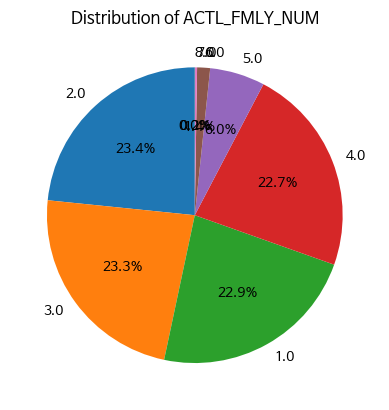

In [321]:
# AGE 컬럼의 값 카운트
age_counts = df_0['ACTL_FMLY_NUM'].value_counts()

# 파이차트 그리기
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)

# 차트 제목 설정
plt.title('Distribution of ACTL_FMLY_NUM')

# 그래프 표시
plt.show()

* 이탈 4 > 3 > 2 > 5 > 1
* 비이탈 2 = 3 = 1 = 4 > 5

In [ ]:
가구원수별 보험이탈자 카이제곱검정

In [326]:
FM_CHI = pd.DataFrame({'8':[30,10], '7':[196,59], '6':[1302,297], '5':[5531,959], '4':[20909,2633], '3':[21399,2045], '2':[21496,1414], '1':[21047,906]})

In [339]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest

chi, pval, dof, expected = stats.chi2_contingency(FM_CHI) 

In [331]:
# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 1568.64
 p-value : 0.000
 degree of freedom: 7
 expected value: 
[[3.67000e+01 2.33800e+02 1.46620e+03 5.95110e+03 2.15872e+04 2.14973e+04
  2.10076e+04 2.01301e+04]
 [3.30000e+00 2.12000e+01 1.32800e+02 5.38900e+02 1.95480e+03 1.94670e+03
  1.90240e+03 1.82290e+03]]


* 유의수준 5%에서 이탈유무별로 가구원수의 차이는 있다고 할 수 있다

In [336]:
count = np.array([5531, 959])
print(count)

[5531  959]


In [337]:
n_obs = np.array([91910, 8323])
print(n_obs)

[91910  8323]


In [340]:
stat, p = proportions_ztest(count, n_obs)

In [341]:
print("2 Proportion test ")
print('z검정통계량:{0:0.3f}'.format(stat)) ; print('p-value:{0:0.3f}'.format(p))

2 Proportion test 
z검정통계량:-19.541
p-value:0.000


* 유의수준 5%에서 이탈유무별 가구원수 5명인 비율의 차이가 있다고 할 수 있음
* z값이 음수이므로 이탈자의 가구원수 5명 비율이 더 높다고 할 수 있음

In [342]:
count = np.array([21047,906])
print(count)

[21047   906]


In [343]:
n_obs = np.array([91910, 8323])
print(n_obs)

[91910  8323]


In [344]:
stat, p = proportions_ztest(count, n_obs)

In [345]:
print("2 Proportion test ")
print('z검정통계량:{0:0.3f}'.format(stat)) ; print('p-value:{0:0.3f}'.format(p))

2 Proportion test 
z검정통계량:25.377
p-value:0.000


* 유의수준 5%에서 이탈유무별 가구원수 1명인 비율의 차이가 있다고 할 수 있음
* z값이 양수이므로 이탈자의 가구원수 1명 비율이 더 낮다고 할 수 있음

In [346]:
count = np.array([21399,2045])
print(count)

[21399  2045]


In [347]:
n_obs = np.array([91910, 8323])
print(n_obs)

[91910  8323]


In [348]:
stat, p = proportions_ztest(count, n_obs)

In [349]:
print("2 Proportion test ")
print('z검정통계량:{0:0.3f}'.format(stat)) ; print('p-value:{0:0.3f}'.format(p))

2 Proportion test 
z검정통계량:-2.658
p-value:0.008


* 유의수준 5%에서 이탈유무별 가구원수 3명인 비율의 차이가 있다고 할 수 있음
* z값이 음수이므로 이탈자의 가구원수 3명 비율이 더 높다고 할 수 있음

<Axes: xlabel='TOT_LNIF_AMT', ylabel='MAX_MON_PREM'>

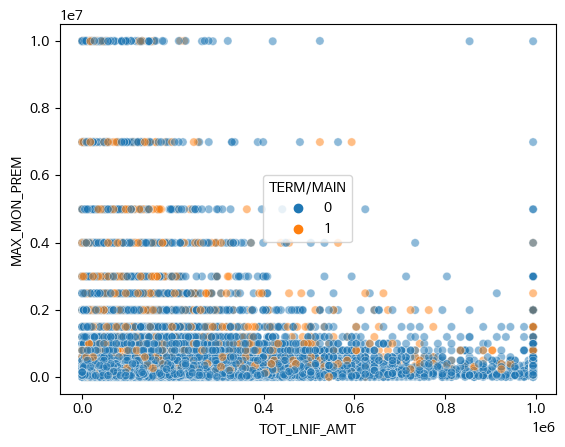

In [365]:
sns.scatterplot(x='TOT_LNIF_AMT', y='MAX_MON_PREM', data=df, hue='TERM/MAIN', alpha=0.5)

In [364]:
df['MAX_MON_PREM'].describe()

count    1.002330e+05
mean     3.734214e+05
std      7.019720e+05
min      0.000000e+00
25%      7.000000e+04
50%      1.900000e+05
75%      3.900000e+05
max      1.000000e+07
Name: MAX_MON_PREM, dtype: float64

<Axes: xlabel='MAX_MON_PREM', ylabel='Count'>

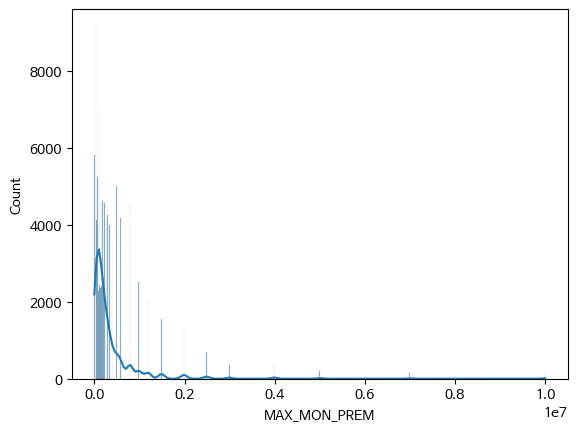

In [385]:
sns.histplot(df['MAX_MON_PREM'],kde=True)

<Axes: xlabel='MAX_MON_PREM', ylabel='Count'>

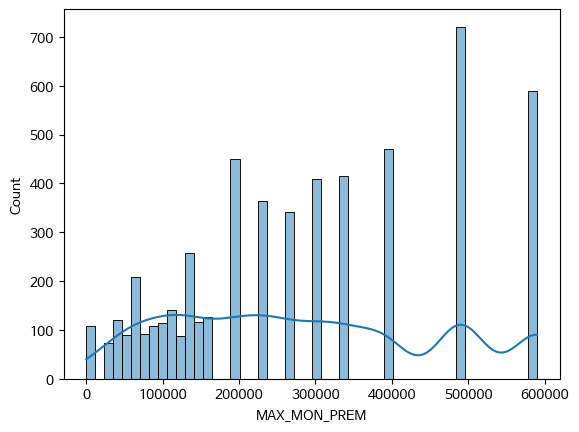

In [395]:
sns.histplot(df_1[df_1['MAX_MON_PREM']<600000]['MAX_MON_PREM'],kde=True, bins=50)

* 보험 유지자의 월최대보험료는 높은 금액대의 밀도가 낮은 반면
* 보험 해지자의 월최대보험료는 높은 금액대의 밀도가 다소 높다고 볼 수 있음sns.histplot(df_1[df_1['MAX_MON_PREM']<600000]['MAX_MON_PREM'],kde=True)
* 보험 이탈자의 월최대보험료는 낮은 금액대의 밀도가 낮음

<Axes: xlabel='MAX_MON_PREM', ylabel='Count'>

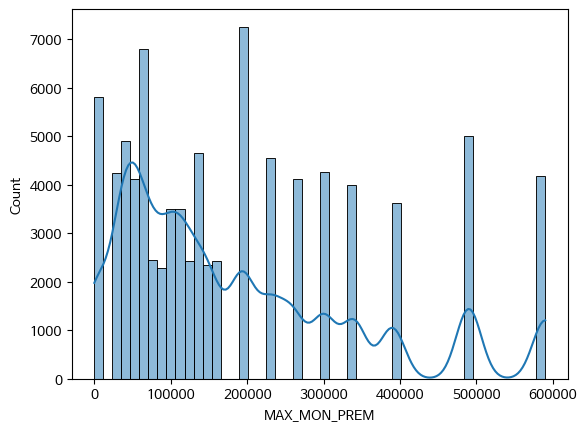

In [396]:
sns.histplot(df[df['MAX_MON_PREM']<600000]['MAX_MON_PREM'],kde=True, bins=50)

대출 총액 비교

<Axes: xlabel='TOT_LNIF_AMT', ylabel='Count'>

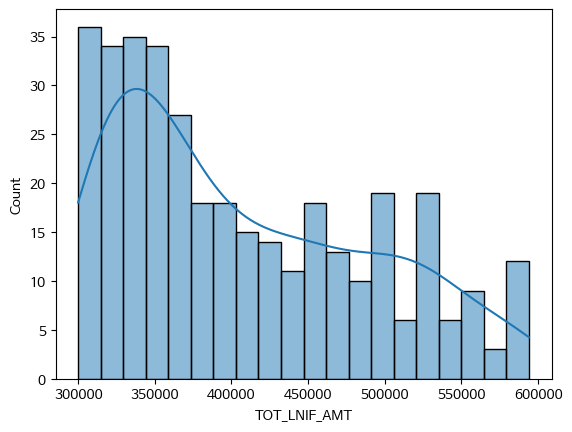

In [412]:
sns.histplot(df_1.loc[(df_1['TOT_LNIF_AMT']<600000) & (df_1['TOT_LNIF_AMT']>300000)]['TOT_LNIF_AMT'],kde=True, bins=20)

<Axes: xlabel='TOT_LNIF_AMT', ylabel='Count'>

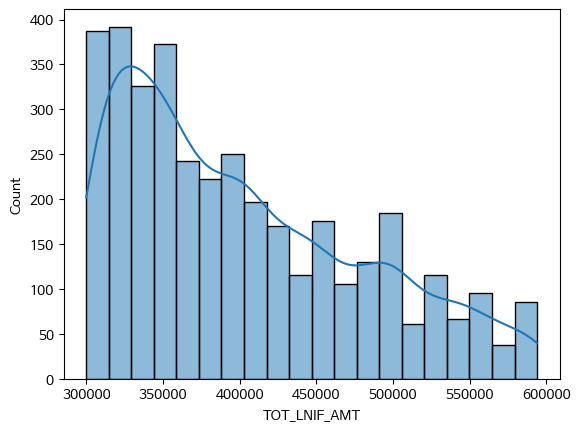

In [411]:
sns.histplot(df_0.loc[(df_0['TOT_LNIF_AMT']<600000) & (df_0['TOT_LNIF_AMT']>300000)]['TOT_LNIF_AMT'],kde=True, bins=20)

약대 비교

In [ ]:
STLN_REMN_AMT

<Axes: xlabel='MAX_MON_PREM', ylabel='Count'>

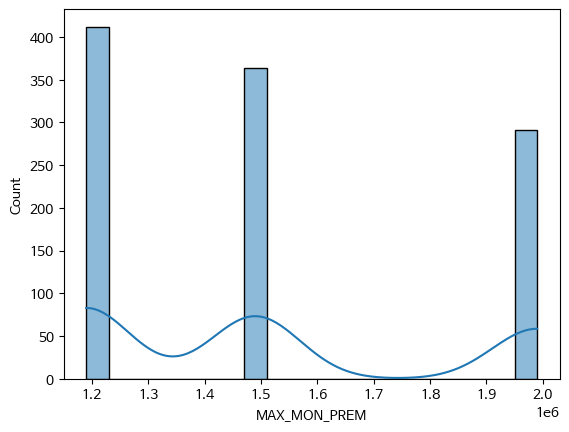

In [431]:
sns.histplot(df_1[(df_1['MAX_MON_PREM']<2000000) & (df_1['MAX_MON_PREM']>1000000)]['MAX_MON_PREM'],kde=True, bins=20)

* 보험 유지자의 월최대보험료는 높은 금액대의 밀도가 낮은 반면
* 보험 해지자의 월최대보험료는 높은 금액대의 밀도가 다소 높다고 볼 수 있음sns.histplot(df_1[df_1['MAX_MON_PREM']<600000]['MAX_MON_PREM'],kde=True)
* 보험 이탈자의 월최대보험료는 낮은 금액대의 밀도가 낮음

<Axes: xlabel='MAX_MON_PREM', ylabel='Count'>

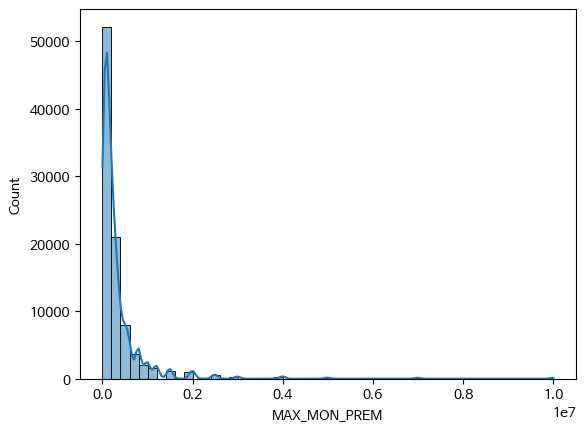

In [416]:
sns.histplot(df_0['MAX_MON_PREM'],kde=True, bins=50)

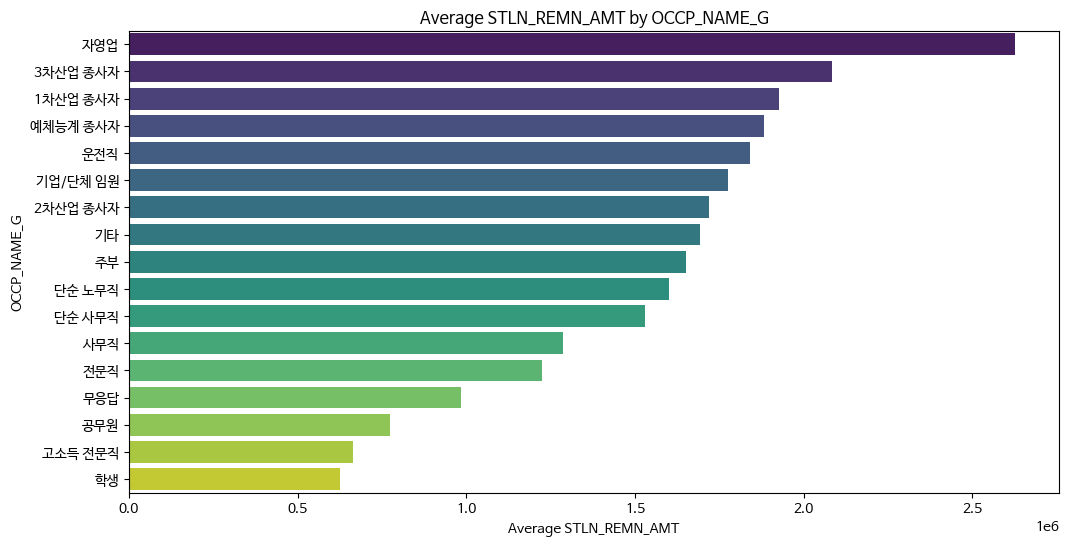

In [435]:

# 'OCCP_NAME_G'별 'STLN_REMN_AMT'의 평균 계산
average_stln_remn = df.groupby('OCCP_NAME_G')['STLN_REMN_AMT'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=average_stln_remn.values, y=average_stln_remn.index, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('Average STLN_REMN_AMT by OCCP_NAME_G')
plt.xlabel('Average STLN_REMN_AMT')
plt.ylabel('OCCP_NAME_G')

# 그래프 표시
plt.show()

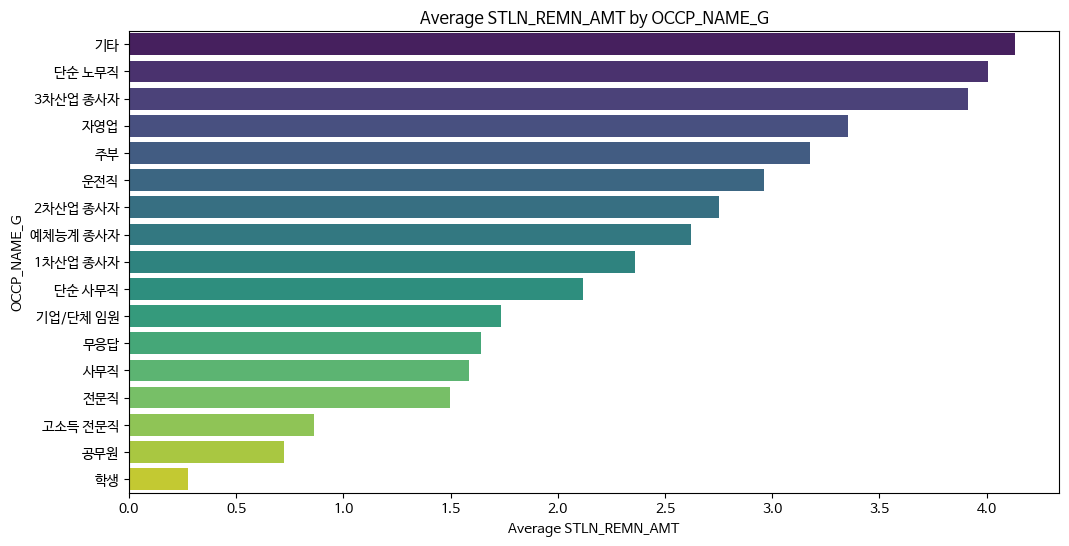

In [437]:

# 'OCCP_NAME_G'별 'STLN_REMN_AMT'의 평균 계산
average_stln_remn = df.groupby('OCCP_NAME_G')['CRLN_OVDU_RATE'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=average_stln_remn.values, y=average_stln_remn.index, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('Average STLN_REMN_AMT by OCCP_NAME_G')
plt.xlabel('Average STLN_REMN_AMT')
plt.ylabel('OCCP_NAME_G')

# 그래프 표시
plt.show()

* 소득이 일정하지 않은 직업들의 신용대출 연체율이 높다

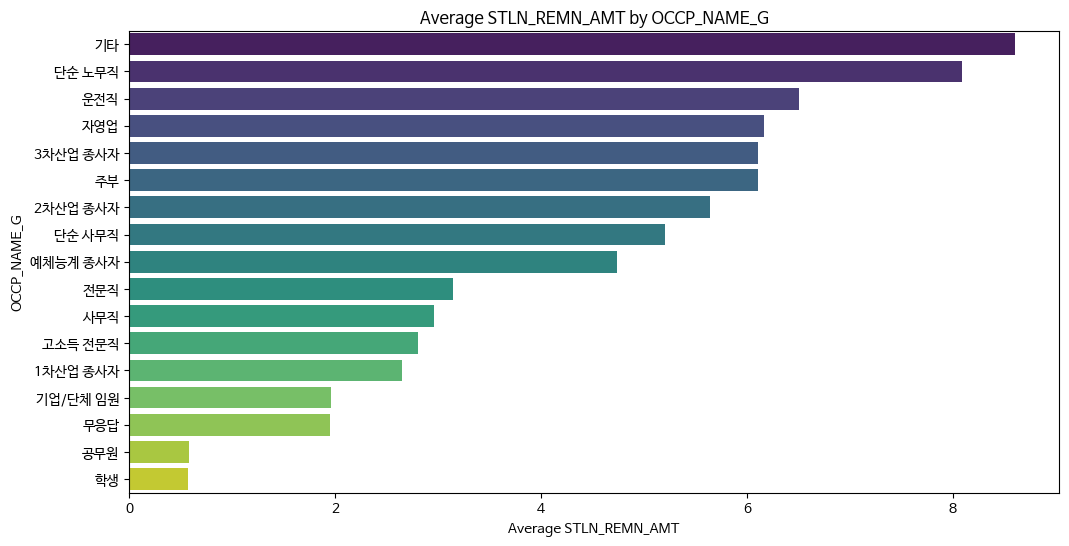

In [443]:

# 'OCCP_NAME_G'별 'STLN_REMN_AMT'의 평균 계산
average_stln_remn = df_1.groupby('OCCP_NAME_G')['CRLN_OVDU_RATE'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=average_stln_remn.values, y=average_stln_remn.index, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('Average STLN_REMN_AMT by OCCP_NAME_G')
plt.xlabel('Average STLN_REMN_AMT')
plt.ylabel('OCCP_NAME_G')

# 그래프 표시
plt.show()

In [463]:
average_stln_remn

OCCP_NAME_G
기타          8.601504
단순 노무직      8.084507
운전직         6.503226
자영업         6.164909
3차산업 종사자    6.106707
주부          6.104062
2차산업 종사자    5.639257
단순 사무직      5.204852
예체능계 종사자    4.735632
전문직         3.146789
사무직         2.960690
고소득 전문직     2.808511
1차산업 종사자    2.647059
기업/단체 임원    1.961538
무응답         1.948718
공무원         0.584459
학생          0.572254
Name: CRLN_OVDU_RATE, dtype: float64

In [ ]:
* 예체능계 종사자(4.7)이상의 사람들 유의

In [495]:
len(df_1[df_1['CRLN_OVDU_RATE']>8])/len(df[df['CRLN_OVDU_RATE']>8])

0.1686723219569935

In [496]:
len(df_1[df_1['CRLN_OVDU_RATE']<8])/len(df[df['CRLN_OVDU_RATE']<8])

0.07840558822601176

In [487]:
len(df_1[df_1['CRLN_OVDU_RATE']<6.7])/len(df[df['CRLN_OVDU_RATE']<6.7])

0.07832834940824664

In [483]:
len(df_1[df_1['CRLN_OVDU_RATE']>6.7])/len(df[df['CRLN_OVDU_RATE']>6.7])

0.16802889184565672

In [453]:
len(df_1[df_1['OCCP_NAME_G']=='단순 노무직'])/len(df[df['OCCP_NAME_G']=='단순 노무직'])

0.08647990255785627

In [454]:
len(df_1[df_1['OCCP_NAME_G']=='공무원'])/len(df[df['OCCP_NAME_G']=='공무원'])

0.058141818896091144

In [461]:
df['CRLN_OVDU_RATE'].value_counts()

0      94387
4        128
2        119
3        113
8        107
       ...  
81        32
26        31
91        29
51        27
100       21
Name: CRLN_OVDU_RATE, Length: 99, dtype: int64

In [497]:
df.groupby('TERM/MAIN')['CRLN_OVDU_RATE'].mean()

TERM/MAIN
0    2.286955
1    5.120149
Name: CRLN_OVDU_RATE, dtype: float64

<Axes: xlabel='TOT_CRLN_AMT', ylabel='Count'>

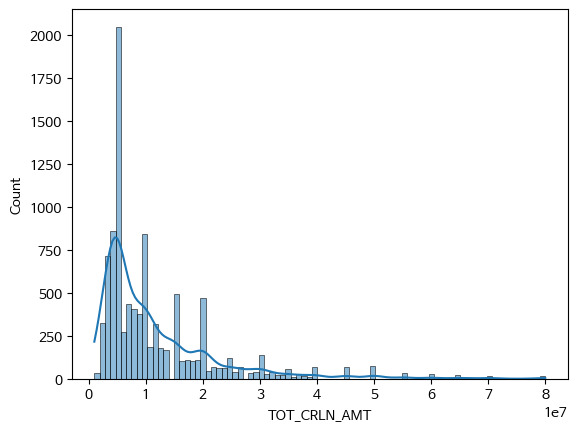

In [615]:
# 1000만원 이하 대출자
sns.histplot(df.loc[(df['TOT_CRLN_AMT']!=0) & (df['TOT_CRLN_AMT']<100000000)]['TOT_CRLN_AMT'],kde=True)


In [665]:
df_TCA300_1 = df.loc[(df['TOT_CRLN_AMT']!=0) & (df['TOT_CRLN_AMT']<3000000)][df['TERM/MAIN']==1]['TOT_CRLN_AMT']
df_TCA300_0 = df.loc[(df['TOT_CRLN_AMT']!=0) & (df['TOT_CRLN_AMT']<3000000)][df['TERM/MAIN']==0]['TOT_CRLN_AMT']
df_TCA300 = df.loc[(df['TOT_CRLN_AMT']!=0) & (df['TOT_CRLN_AMT']<3000000)]['TOT_CRLN_AMT']

In [570]:
print(f'300만원 이하 대출자 중 이탈자 비율: {len(df_TCA300_1)/len(df_TCA300)}')

300만원 이하 대출자 중 이탈자 비율: 0.10277777777777777


In [666]:
print(f'300만원 이하 대출자 중 이탈자 수: {len(df_TCA300_1)}')
print(f'300만원 이하 대출자 중 유지자 수: {len(df_TCA300_0)}')

300만원 이하 대출자 중 이탈자 수: 37
300만원 이하 대출자 중 유지자 수: 323


In [690]:
df_TCA3007000_1 = df.loc[df['TOT_CRLN_AMT']!=0][(df['TOT_CRLN_AMT']>3000000) & (df['TOT_CRLN_AMT']<70000000)][df['TERM/MAIN']==1]['TOT_CRLN_AMT']
df_TCA3007000_0 = df.loc[df['TOT_CRLN_AMT']!=0][(df['TOT_CRLN_AMT']>3000000) & (df['TOT_CRLN_AMT']<70000000)][df['TERM/MAIN']==0]['TOT_CRLN_AMT']
df_TCA3007000 = df.loc[df['TOT_CRLN_AMT']!=0][(df['TOT_CRLN_AMT']>3000000) & (df['TOT_CRLN_AMT']<70000000)]['TOT_CRLN_AMT']

In [692]:
print(f'300만원 이상 7000만원 이하 대출자 중 이탈자 비율: {len(df_TCA3007000_1)/len(df_TCA3007000)}')

300만원 이상 7000만원 이하 대출자 중 이탈자 비율: 0.15384615384615385


In [708]:
print(f'300만원 이상 7000만원 이하 대출자 중 이탈자 수: {len(df_TCA3007000_1)}')
print(f'300만원 이상 7000만원 이하 대출자 중 이탈자 수: {len(df_TCA3007000_0)}')

300만원 이상 7000만원 이하 대출자 중 이탈자 수: 1334
300만원 이상 7000만원 이하 대출자 중 이탈자 수: 7337


In [709]:
df_TCA7000_1 = df.loc[df['TOT_CRLN_AMT']!=0][df['TOT_CRLN_AMT']>70000000][df['TERM/MAIN']==1]['TOT_CRLN_AMT']
df_TCA7000_0 = df.loc[df['TOT_CRLN_AMT']!=0][df['TOT_CRLN_AMT']>70000000][df['TERM/MAIN']==0]['TOT_CRLN_AMT']
df_TCA7000 = df.loc[df['TOT_CRLN_AMT']!=0][df['TOT_CRLN_AMT']>70000000]['TOT_CRLN_AMT']

In [710]:
print(f'7000만원 이상 대출자 중 이탈자 비율: {len(df_TCA7000_1)/len(df_TCA7000)}')

7000만원 이상 대출자 중 이탈자 비율: 0.24285714285714285


In [711]:
print(f'7000만원 이상 대출자 중 이탈자 수: {len(df_TCA7000_1)}')
print(f'7000만원 이상 대출자 중 유지자 수: {len(df_TCA7000_0)}')

7000만원 이상 대출자 중 이탈자 수: 17
7000만원 이상 대출자 중 유지자 수: 53


카이제곱검정

In [ ]:
가구원수별 보험이탈자 카이제곱검정

In [792]:
TCA_CHI = pd.DataFrame({'300이하':[len(df_TCA300_0),len(df_TCA300_1)],
                        '300이상 7000이하':[len(df_TCA3007000_0),len(df_TCA3007000_1)],
                        '7000이상':[len(df_TCA7000_0),len(df_TCA7000_1)]})
TCA_CHI

,300이하,300이상 7000이하,7000이상
0,323,7337,53
1,37,1334,17


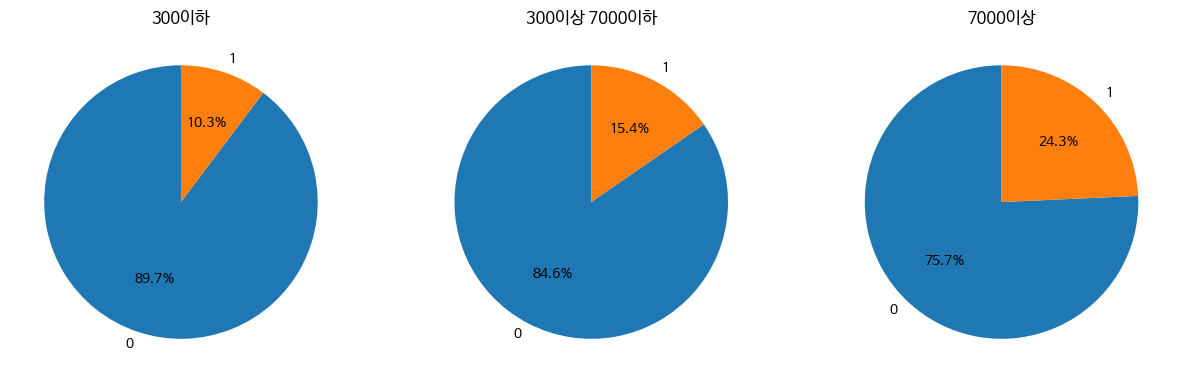

In [795]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, column in enumerate(TCA_CHI.columns):
    ax = axes[idx]
    ax.pie(TCA_CHI[column], labels=TCA_CHI.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

plt.show()

In [719]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest

chi, pval, dof, expected = stats.chi2_contingency(TCA_CHI) 

In [720]:
# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 11.43
 p-value : 0.003
 degree of freedom: 2
 expected value: 
[[ 305.1 7348.6   59.3]
 [  54.9 1322.4   10.7]]


* 유의수준 5%에서 보험사 신용대출금액 구간별 이탈유무의 차이는 있다고 할 수 있다

약관대출 총 대출금액

In [725]:
df_SRA300_1 = df.loc[(df['STLN_REMN_AMT']!=0) & (df['STLN_REMN_AMT']<3000000)][df['TERM/MAIN']==1]['STLN_REMN_AMT']
df_SRA300_0 = df.loc[(df['STLN_REMN_AMT']!=0) & (df['STLN_REMN_AMT']<3000000)][df['TERM/MAIN']==0]['STLN_REMN_AMT']
df_SRA300 = df.loc[(df['STLN_REMN_AMT']!=0) & (df['STLN_REMN_AMT']<3000000)]['STLN_REMN_AMT']

In [726]:
print(f'300만원 이하 대출자 중 이탈자 비율: {len(df_SRA300_1)/len(df_SRA300)}')

300만원 이하 대출자 중 이탈자 비율: 0.15111976630963972


In [727]:
print(f'300만원 이하 대출자 중 이탈자 수: {len(df_SRA300_1)}')
print(f'300만원 이하 대출자 중 유지자 수: {len(df_SRA300_0)}')

300만원 이하 대출자 중 이탈자 수: 776
300만원 이하 대출자 중 유지자 수: 4359


In [741]:
df_SRA3007000_1 = df.loc[df['STLN_REMN_AMT']!=0][(df['STLN_REMN_AMT']>3000000) & (df['STLN_REMN_AMT']<700000000)][df['TERM/MAIN']==1]['STLN_REMN_AMT']
df_SRA3007000_0 = df.loc[df['STLN_REMN_AMT']!=0][(df['STLN_REMN_AMT']>3000000) & (df['STLN_REMN_AMT']<700000000)][df['TERM/MAIN']==0]['STLN_REMN_AMT']
df_SRA3007000 = df.loc[df['STLN_REMN_AMT']!=0][(df['STLN_REMN_AMT']>3000000) & (df['STLN_REMN_AMT']<700000000)]['STLN_REMN_AMT']

In [742]:
print(f'300만원 이상 5000만원 이하 대출자 중 이탈자 비율: {len(df_SRA3007000_1)/len(df_SRA3007000)}')

300만원 이상 5000만원 이하 대출자 중 이탈자 비율: 0.1365758424581954


In [743]:
print(f'300만원 이상 7000만원 이하 대출자 중 이탈자 수: {len(df_SRA3007000_1)}')
print(f'300만원 이상 7000만원 이하 대출자 중 이탈자 수: {len(df_SRA3007000_0)}')

300만원 이상 7000만원 이하 대출자 중 이탈자 수: 1609
300만원 이상 7000만원 이하 대출자 중 이탈자 수: 10172


In [744]:
df_SRA7000_1 = df.loc[df['STLN_REMN_AMT']!=0][df['STLN_REMN_AMT']>70000000][df['TERM/MAIN']==1]['STLN_REMN_AMT']
df_SRA7000_0 = df.loc[df['STLN_REMN_AMT']!=0][df['STLN_REMN_AMT']>70000000][df['TERM/MAIN']==0]['STLN_REMN_AMT']
df_SRA7000 = df.loc[df['STLN_REMN_AMT']!=0][df['STLN_REMN_AMT']>70000000]['STLN_REMN_AMT']

In [745]:
print(f'5000만원 이상 대출자 중 이탈자 비율: {len(df_SRA7000_1)/len(df_SRA7000)}')

5000만원 이상 대출자 중 이탈자 비율: 0.1891891891891892


In [747]:
print(f'7000만원 이상 대출자 중 이탈자 수: {len(df_SRA7000_1)}')
print(f'7000만원 이상 대출자 중 유지자 수: {len(df_SRA7000_0)}')

7000만원 이상 대출자 중 이탈자 수: 21
7000만원 이상 대출자 중 유지자 수: 90


In [ ]:
약관대출 금약대별 보험이탈자 카이제곱검정

In [791]:
SRA_CHI = pd.DataFrame({'300이하':[len(df_SRA300_0),len(df_SRA300_1)],
                        '300이상 7000이하':[len(df_SRA3007000_0),len(df_SRA3007000_1)],
                        '7000이상':[len(df_SRA7000_0),len(df_SRA7000_1)]})
SRA_CHI

,300이하,300이상 7000이하,7000이상
0,4359,10172,90
1,776,1609,21


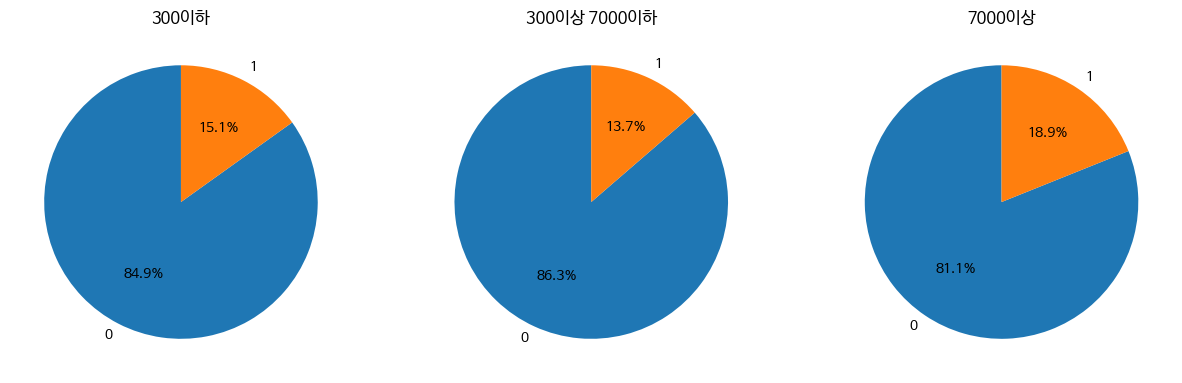

In [796]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, column in enumerate(SRA_CHI.columns):
    ax = axes[idx]
    ax.pie(SRA_CHI[column], labels=SRA_CHI.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

plt.show()

In [749]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest

chi, pval, dof, expected = stats.chi2_contingency(SRA_CHI) 

In [750]:
# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 8.35
 p-value : 0.015
 degree of freedom: 2
 expected value: 
[[ 4409.4 10116.3    95.3]
 [  725.6  1664.7    15.7]]


* 유의수준 5%에서 약관대출금액 구간별 이탈유무의 차이는 있다고 할 수 있다

기타 금융권 총 대출금액

In [772]:
df_TLA300_1 = df.loc[(df['TOT_LNIF_AMT']!=0) & (df['TOT_LNIF_AMT']<30000)][df['TERM/MAIN']==1]['TOT_LNIF_AMT']
df_TLA300_0 = df.loc[(df['TOT_LNIF_AMT']!=0) & (df['TOT_LNIF_AMT']<30000)][df['TERM/MAIN']==0]['TOT_LNIF_AMT']
df_TLA300 = df.loc[(df['TOT_LNIF_AMT']!=0) & (df['TOT_LNIF_AMT']<30000)]['TOT_LNIF_AMT']

In [773]:
print(f'300만원 이하 대출자 중 이탈자 비율: {len(df_TLA300_1)/len(df_TLA300)}')

300만원 이하 대출자 중 이탈자 비율: 0.08308651253260245


In [777]:
print(f'300만원 이하 대출자 중 이탈자 수: {len(df_TLA300_1)}')
print(f'300만원 이하 대출자 중 유지자 수: {len(df_TLA300_0)}')

300만원 이하 대출자 중 이탈자 수: 3759
300만원 이하 대출자 중 유지자 수: 41483


In [779]:
df_TLA3007000_1 = df.loc[df['TOT_LNIF_AMT']!=0][(df['TOT_LNIF_AMT']>30000) & (df['TOT_LNIF_AMT']<700000)][df['TERM/MAIN']==1]['TOT_LNIF_AMT']
df_TLA3007000_0 = df.loc[df['TOT_LNIF_AMT']!=0][(df['TOT_LNIF_AMT']>30000) & (df['TOT_LNIF_AMT']<700000)][df['TERM/MAIN']==0]['TOT_LNIF_AMT']
df_TLA3007000 = df.loc[df['TOT_LNIF_AMT']!=0][(df['TOT_LNIF_AMT']>30000) & (df['TOT_LNIF_AMT']<700000)]['TOT_LNIF_AMT']

In [780]:
print(f'300만원 이상 5000만원 이하 대출자 중 이탈자 비율: {len(df_TLA3007000_1)/len(df_TLA3007000)}')

300만원 이상 5000만원 이하 대출자 중 이탈자 비율: 0.08306691552861604


In [781]:
print(f'300만원 이상 7000만원 이하 대출자 중 이탈자 수: {len(df_TLA3007000_1)}')
print(f'300만원 이상 7000만원 이하 대출자 중 이탈자 수: {len(df_TLA3007000_0)}')

300만원 이상 7000만원 이하 대출자 중 이탈자 수: 4495
300만원 이상 7000만원 이하 대출자 중 이탈자 수: 49618


In [783]:
df_TLA7000_1 = df.loc[df['TOT_LNIF_AMT']!=0][df['TOT_LNIF_AMT']>700000][df['TERM/MAIN']==1]['TOT_LNIF_AMT']
df_TLA7000_0 = df.loc[df['TOT_LNIF_AMT']!=0][df['TOT_LNIF_AMT']>700000][df['TERM/MAIN']==0]['TOT_LNIF_AMT']
df_TLA7000 = df.loc[df['TOT_LNIF_AMT']!=0][df['TOT_LNIF_AMT']>700000]['TOT_LNIF_AMT']

In [784]:
print(f'5000만원 이상 대출자 중 이탈자 비율: {len(df_TLA5000_1)/len(df_TLA5000)}')

5000만원 이상 대출자 중 이탈자 비율: 0.0864600326264274


In [785]:
print(f'7000만원 이상 대출자 중 이탈자 수: {len(df_TLA7000_1)}')
print(f'7000만원 이상 대출자 중 유지자 수: {len(df_TLA7000_0)}')

7000만원 이상 대출자 중 이탈자 수: 69
7000만원 이상 대출자 중 유지자 수: 809


In [ ]:
약관대출 금약대별 보험이탈자 카이제곱검정

In [790]:
TLA_CHI = pd.DataFrame({'300이하':[len(df_TLA300_0),len(df_TLA300_1)],
                        '300이상 7000이하':[len(df_TLA3007000_0),len(df_TLA3007000_1)],
                        '7000이상':[len(df_TLA7000_0),len(df_TLA7000_1)]})
TLA_CHI

,300이하,300이상 7000이하,7000이상
0,41483,49618,809
1,3759,4495,69


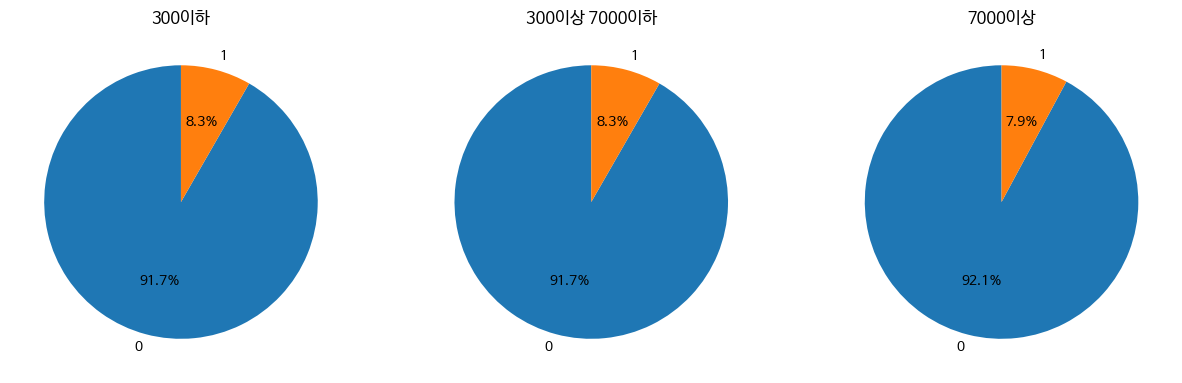

In [797]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, column in enumerate(TLA_CHI.columns):
    ax = axes[idx]
    ax.pie(TLA_CHI[column], labels=TLA_CHI.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

plt.show()

In [787]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest

chi, pval, dof, expected = stats.chi2_contingency(TLA_CHI) 

In [788]:
# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 0.23
 p-value : 0.891
 degree of freedom: 2
 expected value: 
[[41485.3 49619.6   805.1]
 [ 3756.7  4493.4    72.9]]


* 유의수준 5%에서 타기관 총 대출금액 구간별 이탈유무의 차이가 없다고 할 수 있다

In [822]:
df.loc[df['TOT_CRLN_AMT']!=0][df['TOT_CRLN_AMT']>70000000][df['TERM/MAIN']==1]['LTST_CRDT_GRAD']

718       6
3655      2
5862      5
13239     6
25422     2
29888     6
55834     6
59114     3
60405     6
66544     4
66717     4
67821     5
71145     4
79769    10
81807     3
85635     0
90229     6
Name: LTST_CRDT_GRAD, dtype: int64

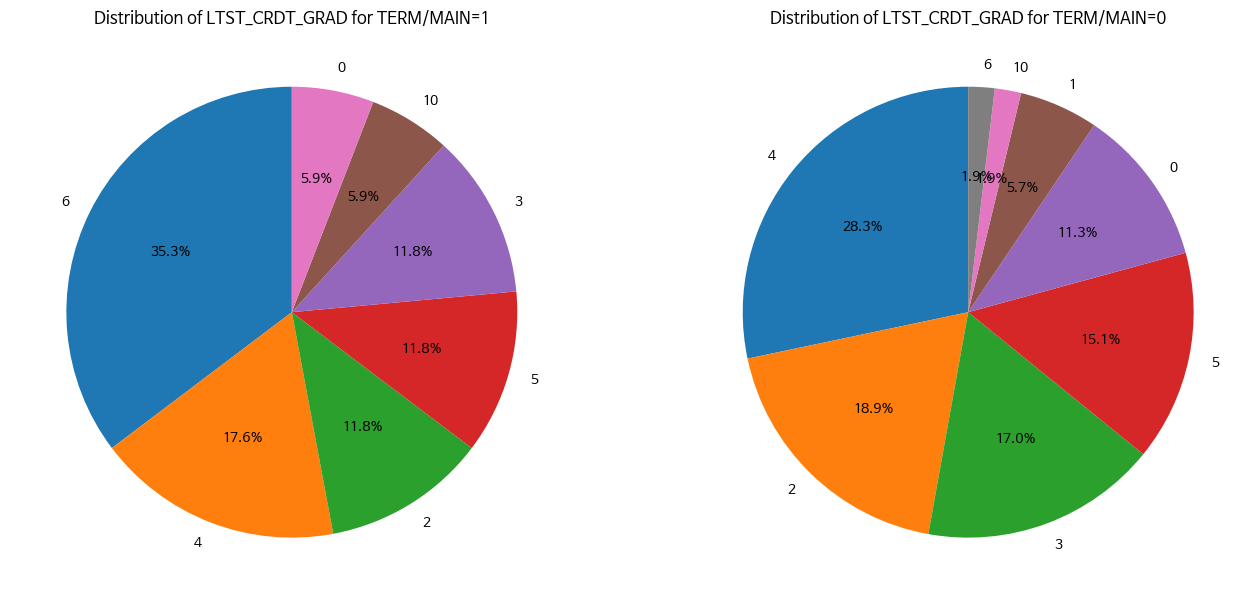

In [844]:
# 두 개의 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# 첫 번째 서브플롯: TERM/MAIN이 1인 경우
filtered_data_1 = df.loc[(df['TOT_CRLN_AMT'] != 0) & (df['TOT_CRLN_AMT'] > 70000000) & (df['TERM/MAIN'] == 1)]
credit_counts_1 = filtered_data_1['LTST_CRDT_GRAD'].value_counts()
axs[0].pie(credit_counts_1, labels=credit_counts_1.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=1')

# 두 번째 서브플롯: TERM/MAIN이 0인 경우
filtered_data_0 = df.loc[(df['TOT_CRLN_AMT'] != 0) & (df['TOT_CRLN_AMT'] > 70000000) & (df['TERM/MAIN'] == 0)]
credit_counts_0 = filtered_data_0['LTST_CRDT_GRAD'].value_counts()
axs[1].pie(credit_counts_0, labels=credit_counts_0.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=0')

# 그래프 표시
plt.show()

In [841]:
35.3+11.8+5.9

52.99999999999999

In [842]:
15.1+1.9+1.9

18.9

* 보험사 신용대출로 7000만원 이상 대출한 사람 중 이탈자들에서 신용등급 5등급 이하의 비중은 52.9%로 매우 높음
* 보험사 신용대출로 7000만원 이상 대출한 사람 중 이탈자들에서 신용등급 5등급 이하의 비중은 18.9%로 훨씬 낮음
* 특히 6등급이 많음

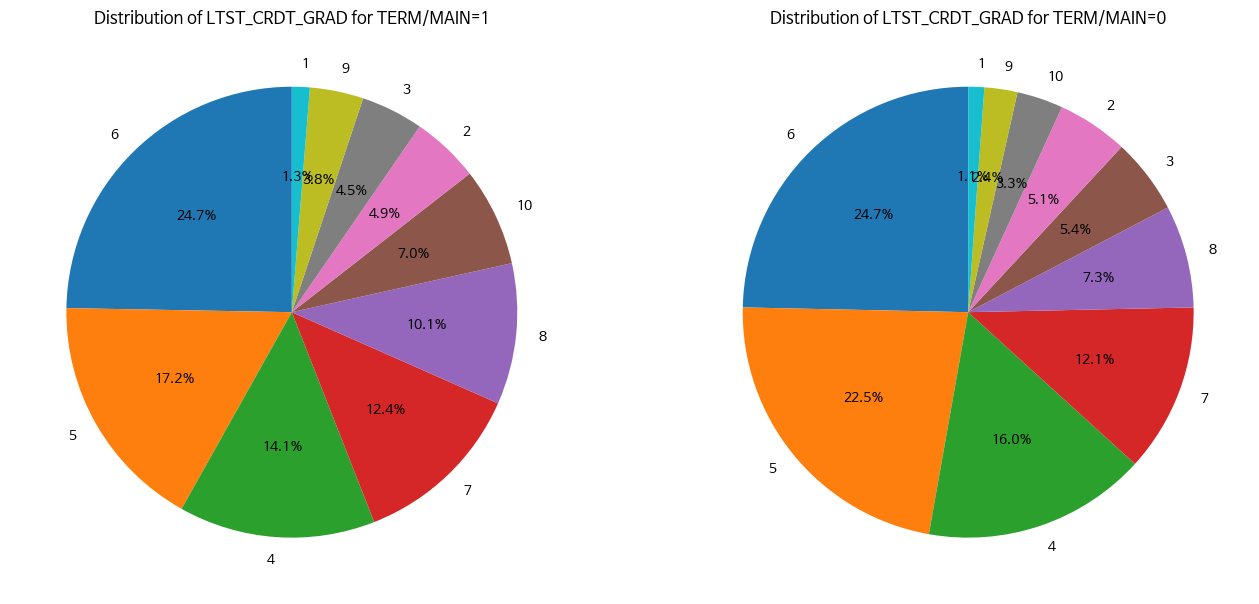

In [847]:
# 두 개의 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# 첫 번째 서브플롯: TERM/MAIN이 1인 경우
filtered_data_1 = df.loc[df['TOT_CRLN_AMT']!=0][(df['TOT_CRLN_AMT']>3000000) & (df['TOT_CRLN_AMT']<70000000)][df['TERM/MAIN']==1][df['LTST_CRDT_GRAD']!=0]
credit_counts_1 = filtered_data_1['LTST_CRDT_GRAD'].value_counts()
axs[0].pie(credit_counts_1, labels=credit_counts_1.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=1')

# 두 번째 서브플롯: TERM/MAIN이 0인 경우
filtered_data_0 = df.loc[df['TOT_CRLN_AMT']!=0][(df['TOT_CRLN_AMT']>3000000) & (df['TOT_CRLN_AMT']<70000000)][df['TERM/MAIN']==0][df['LTST_CRDT_GRAD']!=0]
credit_counts_0 = filtered_data_0['LTST_CRDT_GRAD'].value_counts()
axs[1].pie(credit_counts_0, labels=credit_counts_0.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=0')

# 그래프 표시
plt.show()



In [850]:
24.7+12.4+10.1+3.8+7.0

58.0

In [851]:
24.7+12.1+7.3+2.4

46.49999999999999

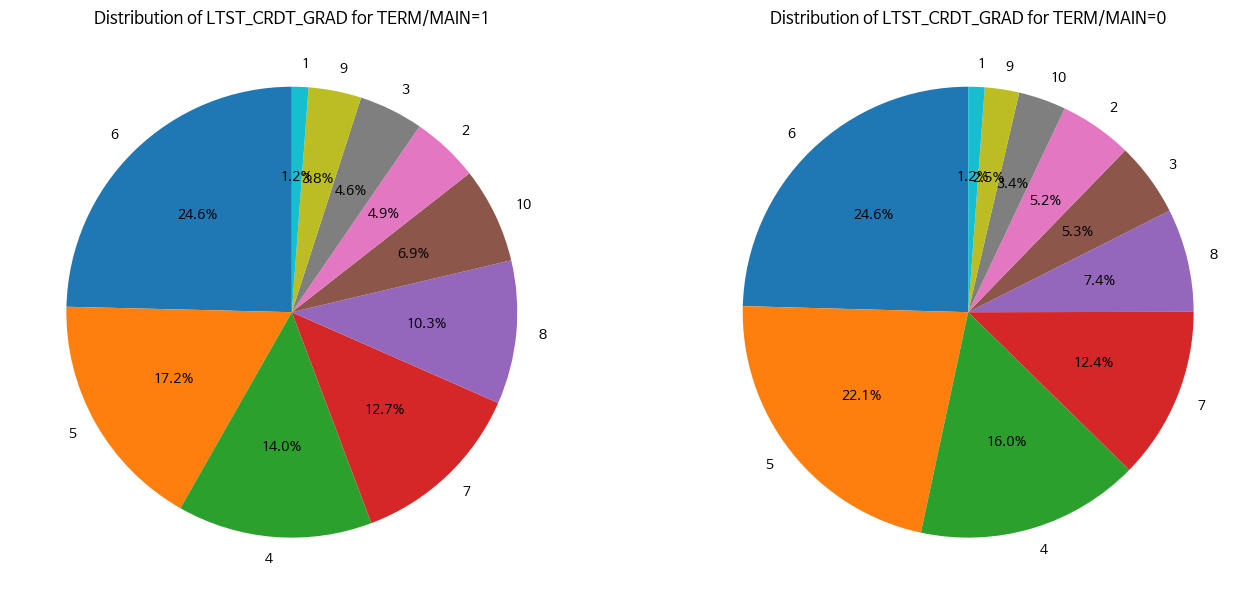

In [856]:
# 두 개의 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# 첫 번째 서브플롯: TERM/MAIN이 1인 경우
filtered_data_1 = df.loc[df['TOT_CRLN_AMT']!=0][df['TERM/MAIN']==1][df['LTST_CRDT_GRAD']!=0]
credit_counts_1 = filtered_data_1['LTST_CRDT_GRAD'].value_counts()
axs[0].pie(credit_counts_1, labels=credit_counts_1.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=1')

# 두 번째 서브플롯: TERM/MAIN이 0인 경우
filtered_data_0 = df.loc[df['TOT_CRLN_AMT']!=0][df['TERM/MAIN']==0][df['LTST_CRDT_GRAD']!=0]
credit_counts_0 = filtered_data_0['LTST_CRDT_GRAD'].value_counts()
axs[1].pie(credit_counts_0, labels=credit_counts_0.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=0')

# 그래프 표시
plt.show()

In [861]:
100 - (1.2 + 4.9 + 4.6 + 14.0)

75.3

In [862]:
100 - (1.2 + 5.2 + 5.3 + 16.0)

72.3

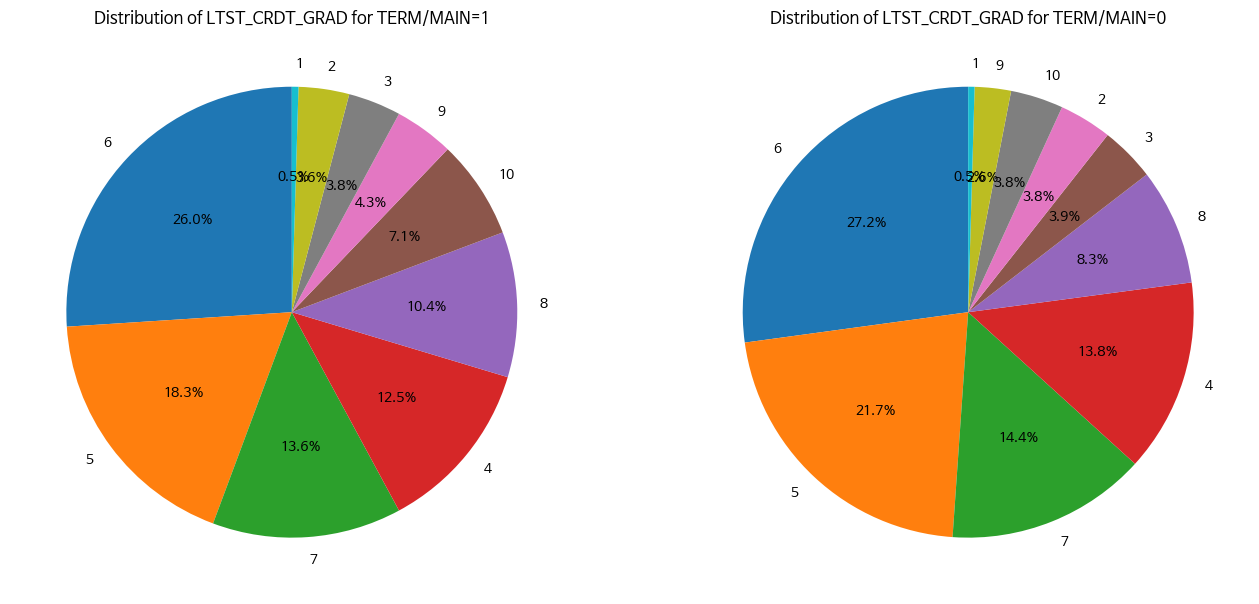

In [855]:
# 두 개의 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# 첫 번째 서브플롯: TERM/MAIN이 1인 경우
filtered_data_1 = df.loc[df['STLN_REMN_AMT']!=0][df['TERM/MAIN']==1][df['LTST_CRDT_GRAD']!=0]
credit_counts_1 = filtered_data_1['LTST_CRDT_GRAD'].value_counts()
axs[0].pie(credit_counts_1, labels=credit_counts_1.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=1')

# 두 번째 서브플롯: TERM/MAIN이 0인 경우
filtered_data_0 = df.loc[df['STLN_REMN_AMT']!=0][df['TERM/MAIN']==0][df['LTST_CRDT_GRAD']!=0]
credit_counts_0 = filtered_data_0['LTST_CRDT_GRAD'].value_counts()
axs[1].pie(credit_counts_0, labels=credit_counts_0.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of LTST_CRDT_GRAD for TERM/MAIN=0')

# 그래프 표시
plt.show()

In [857]:
100 - (0.5 + 3.6 + 3.8 + 12.5)

79.6

In [858]:
100 - (0.5 + 3.8 + 3.9 + 13.8)

78.0

* 낮은 신용등급이 대부분으로 이탈과 유지에서 거의 차이가 없으며, 약관대출은 신용등급이 필요없기 때문에 낮은 신용등급이 많이 이용하는걸로 보임